## **Programming for Data Analysis Assignment 2**

**Rachel King**

***

## **Table of Contents**

## **Introduction**

In [223]:
# to import packages used in the data analysis
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.impute import SimpleImputer
import random
from scipy import stats
from plotly.offline import iplot
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Temperature and CO2**

In [2]:
# to read in CSV files
# https://saturncloud.io/blog/how-to-fix-the-pandas-unicodedecodeerror-utf8-codec-cant-decode-bytes-in-position-01-invalid-continuation-byte-error/
epica = pd.read_csv('CSV Files\Epica Temp.csv', encoding='ISO-8859-1')
ipcc = pd.read_csv('CSV Files\IPCC CO2.csv')
nature = pd.read_csv('CSV Files/Nature CO2.csv', dtype={'year': int})

In [3]:
# to round the year values and extract the columns required (year, temperature and CO₂)
epica.year = epica.year.round()
ipcc["year"] = pd.to_numeric(ipcc["year"])
ipcc.year = ipcc.year.round()

epica = epica[['year', 'temp']]
ipcc = ipcc[['year', 'co2']]
nature = nature[['year', 'co2']]

In [4]:
nature["year"] = pd.to_numeric(nature["year"])
nature.year = nature.year.round()

In [5]:
# to subtract the year values in each dataset from 1950 to reflect 1950 as present day
# this enables the years to be read as normal, with any negative values reflecting B.C. 
# https://stackoverflow.com/questions/33140496/how-to-substract-a-single-value-from-column-of-pandas-dataframe
epica['year'] = 1950 - epica['year']
ipcc['year'] = 1950 - ipcc['year']
nature['year'] = 1950 - nature['year']

In [6]:
# to comine the CO₂ datasets 
# https://stackoverflow.com/questions/36725720/merging-two-dataframes-with-same-column-names-but-different-number-of-columns-in
combined_CO2 = pd.concat([ipcc, nature])
combined_CO2.sort_values(by=['year'], ascending=True)

# to combine the temperature datasets
temp_CO2 = pd.concat([epica.dropna(), combined_CO2.dropna()], ignore_index=True)
temp_CO2.sort_values(by=['year'], ascending=True);

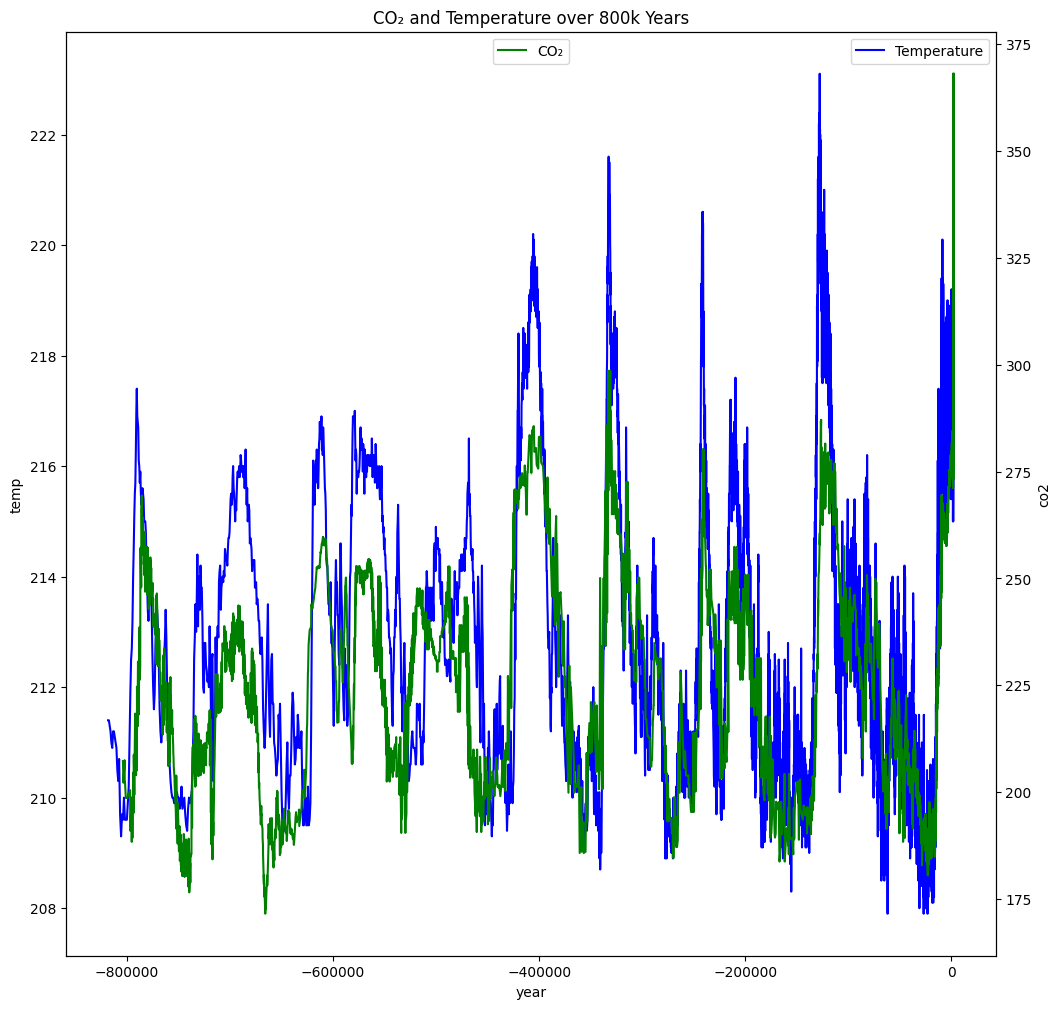

In [7]:
# to plot temperature and CO₂ using seaborn
# https://stackoverflow.com/questions/55981638/how-to-create-a-legend-for-a-seaborn-lineplot-with-two-separately-calculated-lin
# https://goodboychan.github.io/python/datacamp/visualization/2020/06/26/02-Plotting-time-series.html
fig, ax = plt.subplots(figsize=(12,12))
sns.lineplot(x="year", y="temp", data=temp_CO2, color="b", label="Temperature")
ax2 = plt.twinx()
sns.lineplot(x="year", y="co2", data=temp_CO2, color="g", ax=ax2, label="CO₂")
plt.title("CO₂ and Temperature over 800k Years")
plt.legend(loc='upper center')

In [8]:
# to read in more recent temperature data past 1950
temp_present = pd.read_csv('CSV Files/temp 1958 to present.csv', encoding='ISO-8859-1', dtype={'year': int})
temp_present = temp_present[['year', 'temp']]

# to combine the temperature data together
combined_temp = pd.concat([epica, temp_present])
combined_temp.sort_values(by=['year'], inplace=True, ascending=True);
# to make the year column an int
combined_temp = combined_temp.astype({'year':'int'})    # https://stackoverflow.com/questions/43396993/pandas-is-treating-integer-values-as-strings-while-sorting-why

In [9]:
# to read in more recent CO₂ data past 1950
# specifying the data type for a column
# https://www.statology.org/pandas-read-csv-dtype/
co2_present = pd.read_csv('CSV Files\co2_annmean_mlo.csv', encoding='ISO-8859-1', dtype={'year': int})
co2_present = co2_present[['year', 'co2']]

# to combine the CO₂ data together
total_combined_co2 = pd.concat([combined_CO2, co2_present])
total_combined_co2.sort_values(by=['year'], inplace=True, ascending=True);
total_combined_co2 = total_combined_co2.astype({'year':'int'})

In [10]:
# to combine the temperature and CO₂ data into one dataframe
# https://pandas.pydata.org/docs/user_guide/merging.html
temp_CO2_present = combined_temp.merge(total_combined_co2, on='year', how='outer')
temp_CO2_present.sort_values(by=['year'], inplace=True, ascending=True);
temp_CO2_present = temp_CO2_present.astype({'year':'int'})

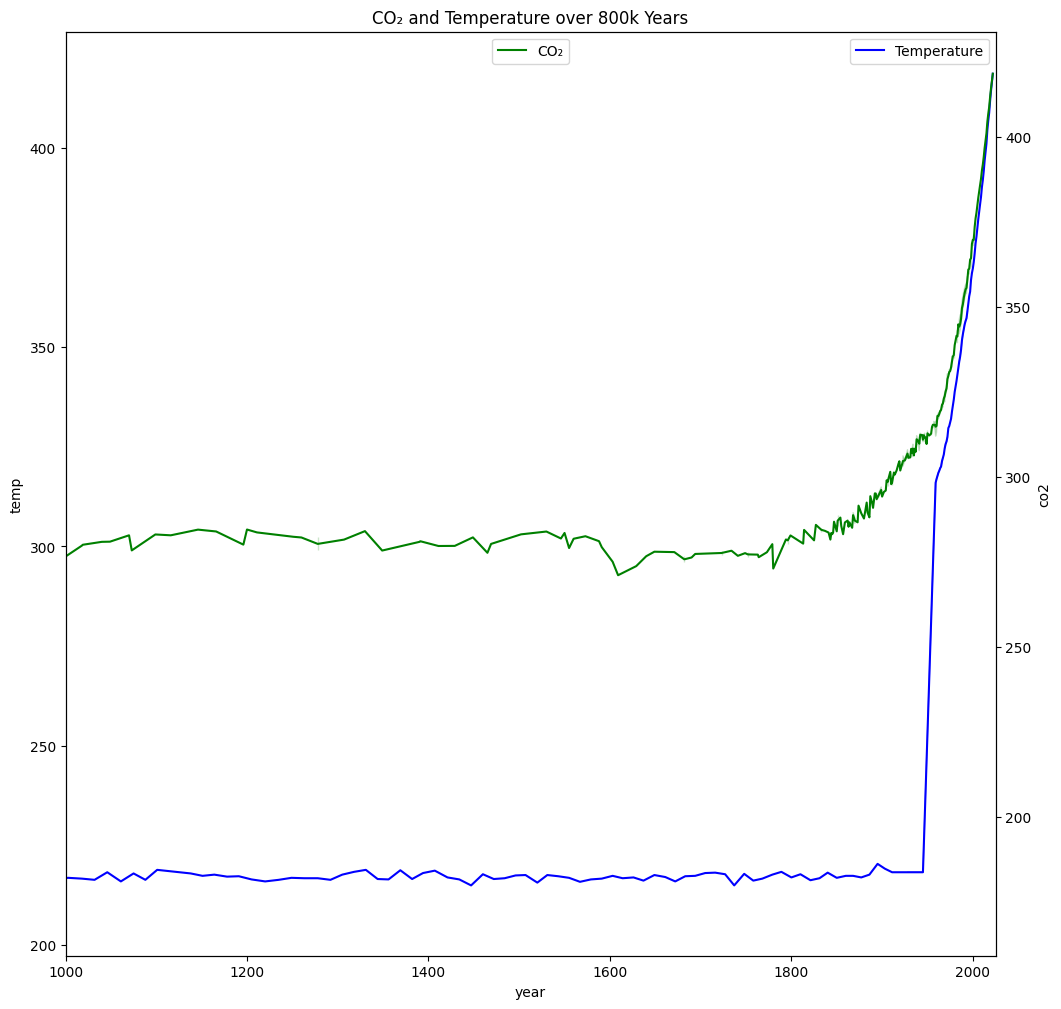

In [11]:
# to plot temperature and CO₂ data from 1900-2020
# using seaborn plot with two y axes 
# https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="temp", data=temp_CO2_present, color="b", ax=ax1, label="Temperature")
sns.lineplot(x="year", y="co2", data=temp_CO2_present, color="g", ax=ax2, label="CO₂")
# changing the x axis range to ensure plot shows only from 1900 onwards
# as the 20th century is when the data began to change
# https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
ax1.set_xlim(1000, 2025)
ax2.set_xlim(1000, 2025)
plt.title("CO₂ and Temperature over 800k Years")
plt.legend(loc='upper center')

## **Sea Ice**

In [12]:
# to read in csv file for polar ice levels
# https://www.kaggle.com/datasets/nsidcorg/daily-sea-ice-extent-data/data
sea_ice = pd.read_csv('CSV Files\seaice.csv')

In [13]:
# I only used data from the northern hemisphere
northern = sea_ice[sea_ice.iloc[:,6]=='north']

In [14]:
# Save the list of the years
years_list = list(northern['Year'].value_counts().index)
years_list = sorted(years_list)

In [15]:
# to stop warnings from displaying when the cell is ran
import warnings
warnings.simplefilter(action='ignore')
# Calcule monthly average of sea ice extent
# https://www.kaggle.com/code/antoniomartin/prediction-of-sea-ice-extent-in-2030/notebook
def by_months(northern):    
    n_months = 3 + ((2019-1979) * 12) + 5 
    sea_ice_monthly = pd.DataFrame(columns=['Year', 'Month', 'Extent'], index=range(n_months))
    i = 0
    for year in years_list:
        
        if year == 1978:
            months_list = range(10,13)
        elif year == 2019:
            months_list = range(1,6)
        else:
            months_list = range(1,13)

        for month in months_list:
            subset = northern[northern['Year']==year][northern.iloc[:,1]==month]
            monthly_mean = np.mean(subset.iloc[:,3])
            sea_ice_monthly.iloc[i] = [year, month, monthly_mean]
            i += 1

    return sea_ice_monthly

sea_ice_clean = by_months(northern)

In [17]:
# Sort the dataset per month and year
sea_ice_clean = sea_ice_clean.sort_values(['Month', 'Year'])
sea_ice_clean = sea_ice_clean.reset_index().drop(['index'], axis=1)
sea_ice_clean.head()

,Year,Month,Extent
0,1979,1,15.414
1,1980,1,14.861875
2,1981,1,14.909688
3,1982,1,15.176733
4,1983,1,14.942438


In [216]:
# to create a list of mean sea ice extent for each month of the year
mean_years = []
std_dict = {}
for m in range(1,13):
  #Calcule mean and std values
  mu = sea_ice_clean[sea_ice_clean.Month == m]['Extent'].mean()
  std = sea_ice_clean[sea_ice_clean.Month == m]['Extent'].std()
  #Save mean and std values
  mean_years.append(mu)
  std_dict[m] = std

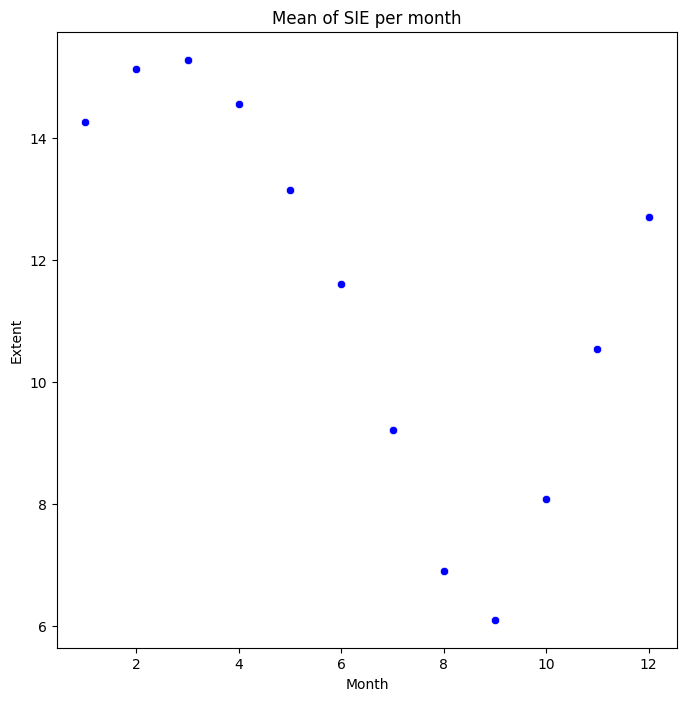

In [19]:
# to convert the list into a datafrane 
df_mean_years = pd.DataFrame(mean_years)
# to create a list to correspond to the months of the year
df_mean_years['Month'] = range(1, 13)
df_mean_years.columns = ['Extent', 'Month']
# to plot the mean sea ice extent for each month
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Month', y='Extent', data=df_mean_years,  color='blue', sizes=20).set(title='Mean of SIE per month')
plt.show()

In [220]:
#Compute Sea Ice Extent anomalies
def anomaliesSIE(sea_ice):
  #Calcule mean by months from 1981-2010
  df_30y = sea_ice.query('1981 <= Year <= 2010')
  df_30y = df_30y.reset_index().drop(['index'], axis=1)
  mean_30y = []
  for m in range(1,13):
    mu = sea_ice[sea_ice.Month == m]['Extent'].mean()
    mean_30y.append(mu)

  #Compute SIE anomalies
  anomalies_list = []
  for s in range(0, len(sea_ice)):
    mean_30y_index = sea_ice.loc[s, 'Month']-1
    #Calcule anomalies
    anomalies_SIE = sea_ice.loc[s, 'Extent'] - mean_30y[mean_30y_index]
    anomalies_SIE = anomalies_SIE/mean_30y[mean_30y_index]*100
    #Save anomalies
    anomalies_list.append(anomalies_SIE)
  sea_ice['AnomaliesSIE'] = anomalies_list
  return sea_ice, mean_30y

df_SIE, mean_30y = anomaliesSIE(sea_ice_clean)

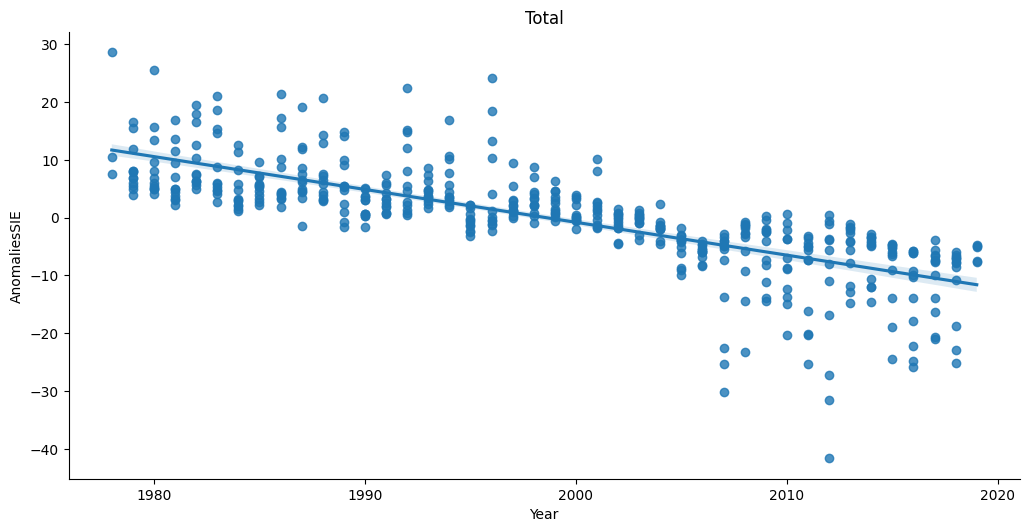

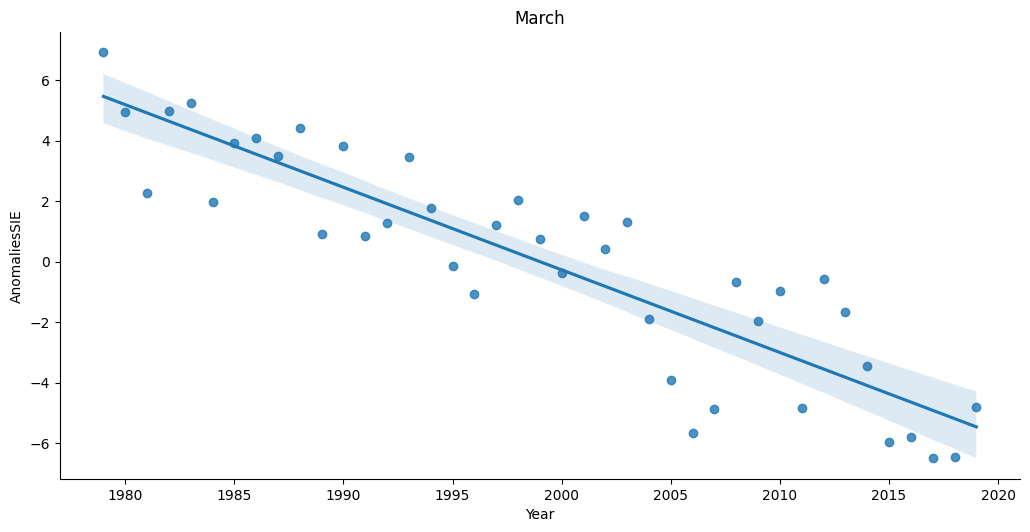

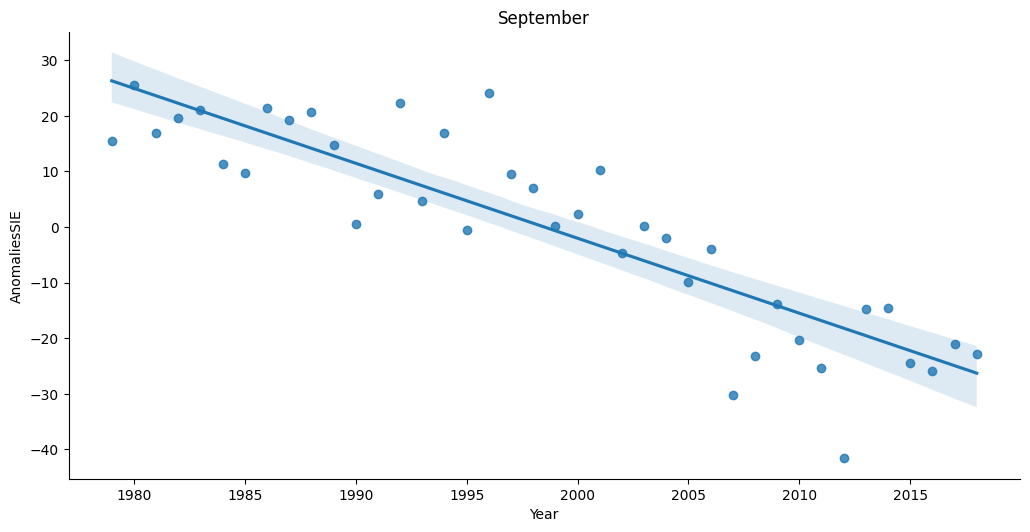

In [21]:
# to convert the year column to numeric values
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
df_SIE['Year'] = pd.to_numeric(df_SIE['Year'])
# to plot the total sea ice extent anomalies
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE, height=5.2, aspect=2).set(title='Total')
plt.show()
# to plot the sea ice extent anomalies for March
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE[df_SIE.Month == 3], height=5.2, aspect=2).set(title='March')
plt.show()
# to plot the sea ice extent anomalies for September
sns.lmplot(x='Year', y='AnomaliesSIE', data=df_SIE[df_SIE.Month == 9], height=5.2, aspect=2).set(title='September')
plt.show()

In [222]:
# to create a list of sea ice extent mean for each year from 1978 - 2018
seaice_mean = []
std_dict = {}
for y in range(1978, 2019):
  #Calcule mu and std values
  mu = sea_ice_clean[sea_ice_clean.Year == y]['Extent'].mean()
  std = sea_ice_clean[sea_ice_clean.Year == y]['Extent'].std()
  #Save mu and std values
  seaice_mean.append(mu)
  std_dict[y] = std

In [23]:
years_seaice = list(range(1978, 2019));

df_seaice_mean = pd.DataFrame({'year': years_seaice, 'sea_ice': seaice_mean})
# to round the mean value to 2 decimal places
df_seaice_mean.sea_ice = df_seaice_mean.sea_ice.round(2)

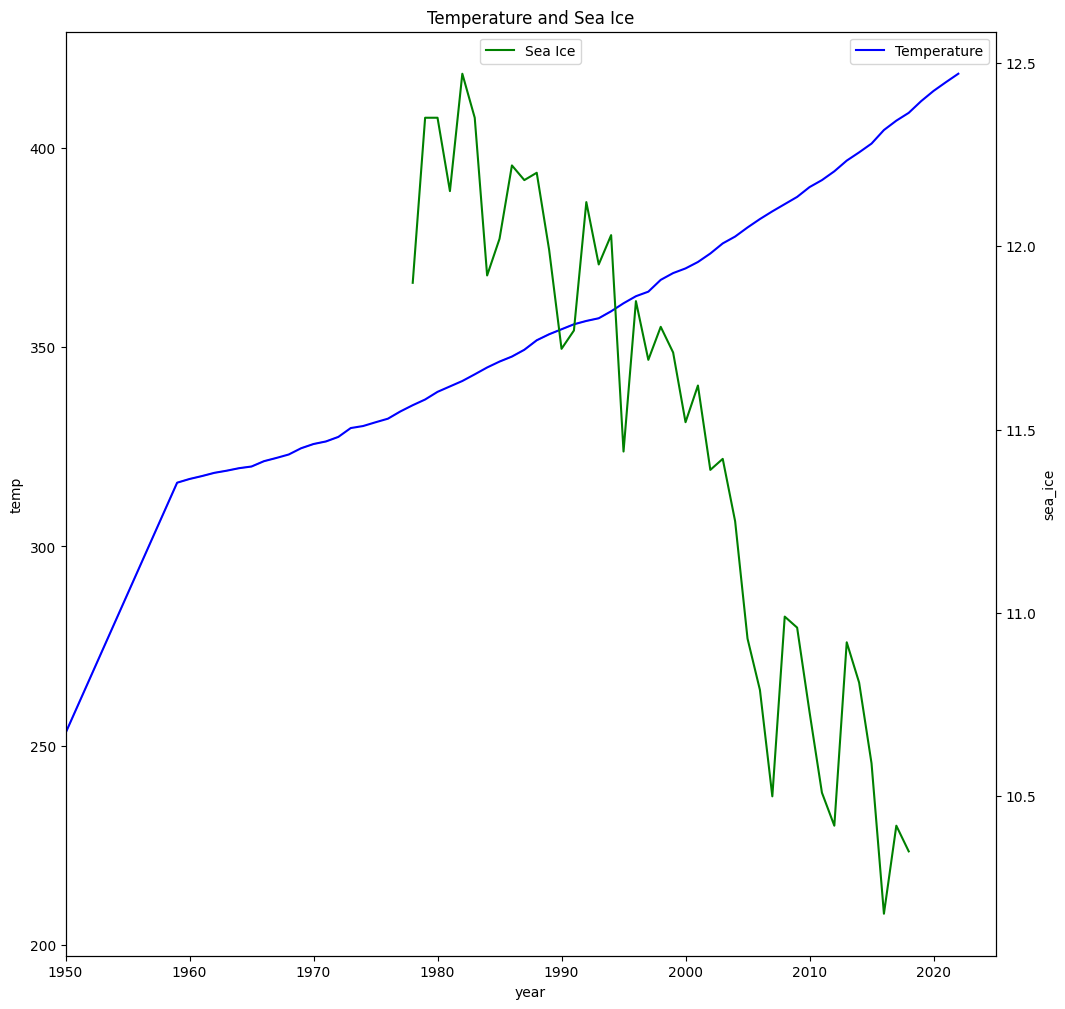

In [24]:
# to plot temperature vs sea ice from 1950 using seaborn
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="temp", data=temp_CO2_present, color="b", ax=ax1, label="Temperature")
sns.lineplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice")
ax1.set_xlim(1950, 2025)
ax2.set_xlim(1950, 2025)
plt.title("Temperature and Sea Ice")
plt.legend(loc='upper center')

In [25]:
# to create a dataframe with temperature and CO₂ data from 1960 onwards for analysis purposes
temp_CO2_from_1960 = temp_CO2_present[temp_CO2_present['year'] >= 1960]
# to drop duplicate temperature values for any given year, the highest temperature value was taken
temp_CO2_from_1960 = temp_CO2_from_1960.sort_values('temp', ascending=False).drop_duplicates('year').sort_index()

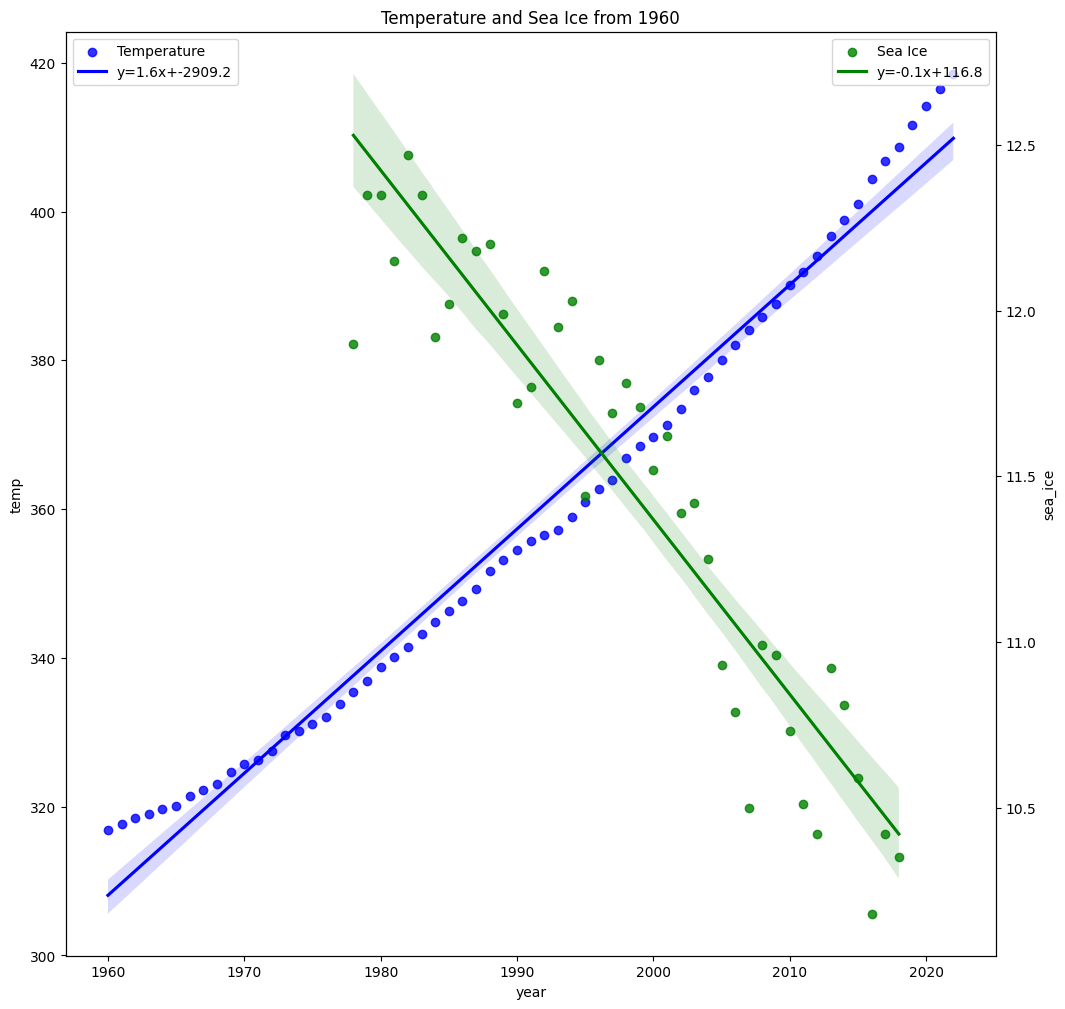

In [26]:
# to plot linear regression plot of temperature and sea ice from 1960 with equation using seaborn
# https://stackoverflow.com/questions/45902739/annotate-the-linear-regression-equation
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_CO2_from_1960['year'],temp_CO2_from_1960['temp'])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df_seaice_mean['year'],df_seaice_mean['sea_ice'])

# to plot a regression plot of Temperature and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.regplot(x="year", y="temp", data=temp_CO2_from_1960, color="b", ax=ax1, label="Temperature", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
sns.regplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
plt.title("Temperature and Sea Ice from 1960")
ax1.legend()
ax2.legend()

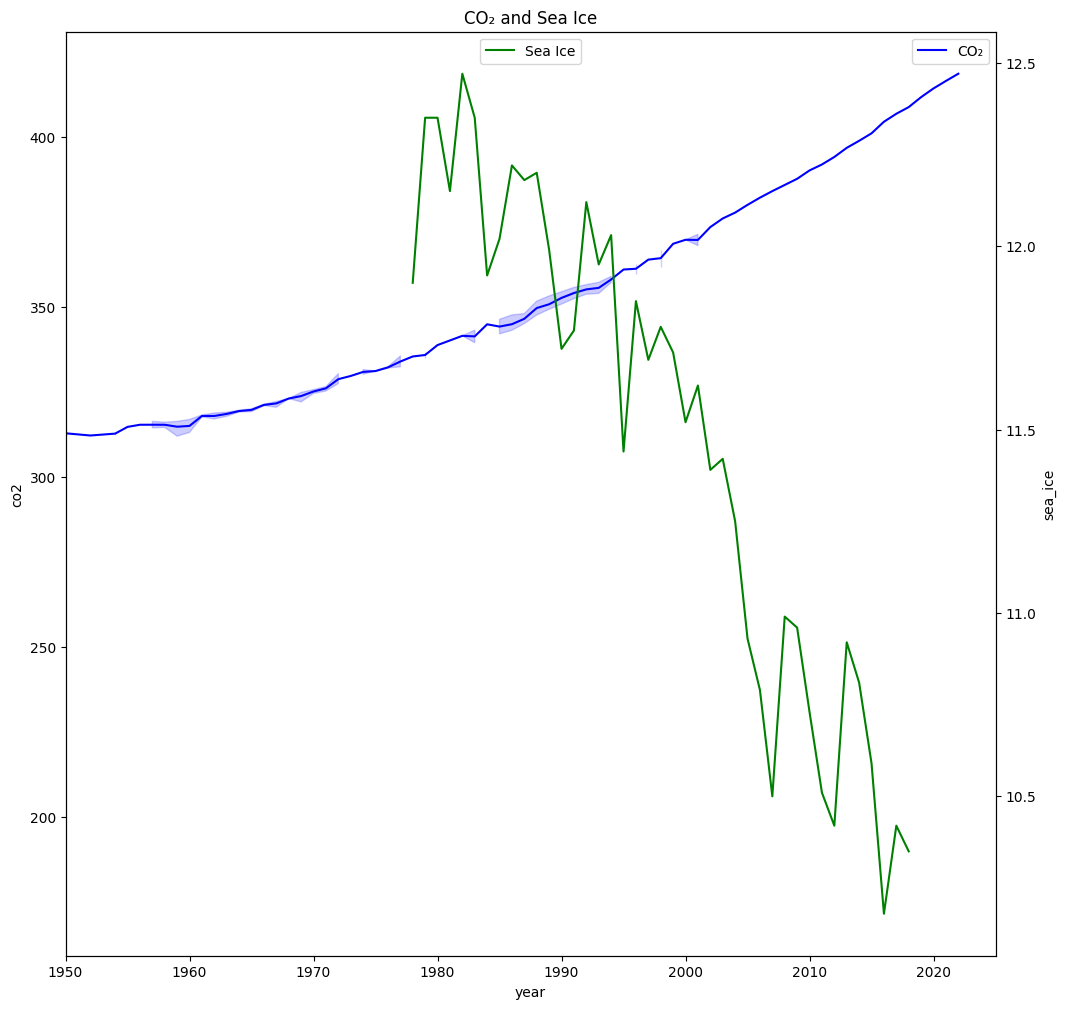

In [27]:
# to plot CO₂ and sea ice from 1950 using seaborn
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="co2", data=temp_CO2_present, color="b", ax=ax1, label="CO₂")
sns.lineplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice")
ax1.set_xlim(1950, 2025)
ax2.set_xlim(1950, 2025)
plt.title("CO₂ and Sea Ice")
plt.legend(loc='upper center')

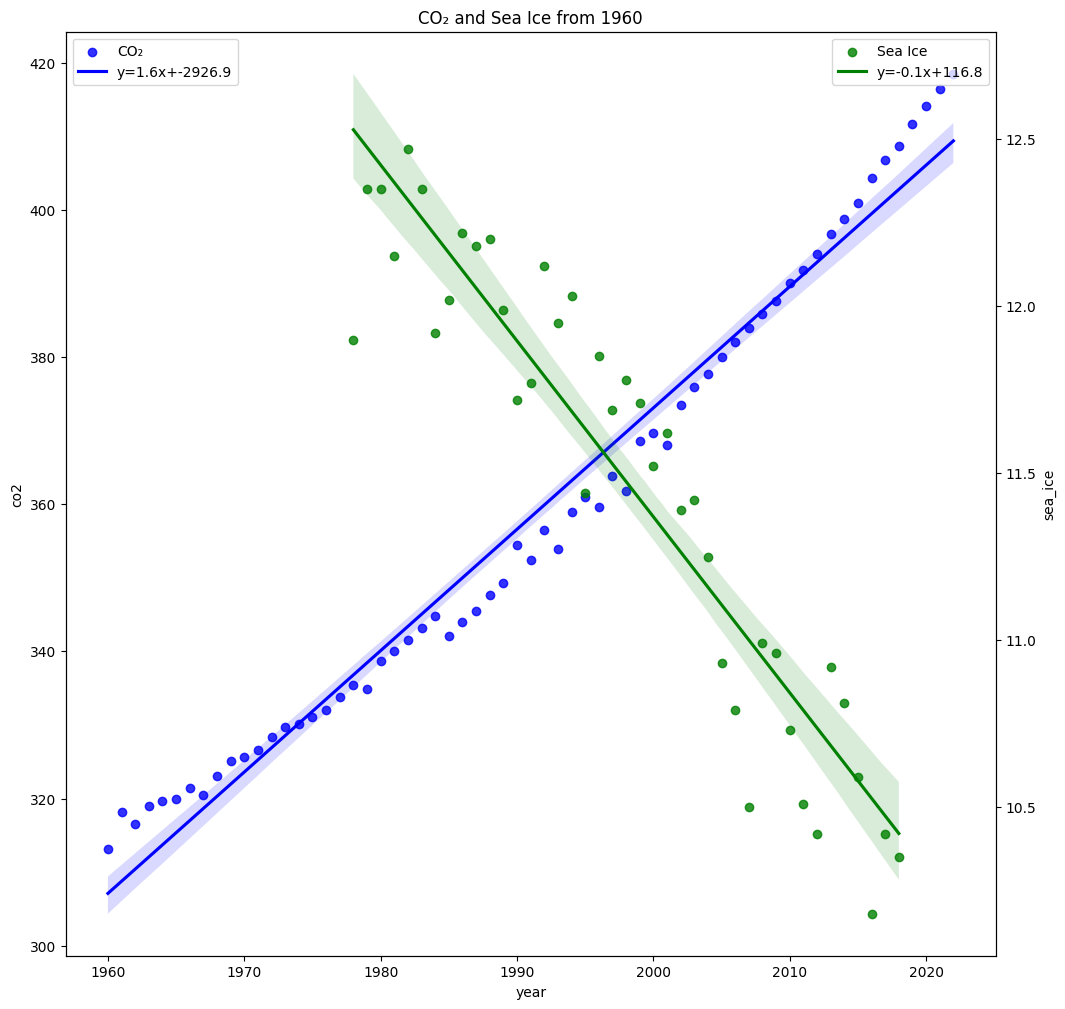

In [28]:
# to plot linear regression plot of CO₂ and sea ice from 1960 with equation using seaborn
# get coeffs of linear fit
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(temp_CO2_from_1960['year'],temp_CO2_from_1960['co2'])

# to plot a regression plot of CO₂ and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.regplot(x="year", y="co2", data=temp_CO2_from_1960, color="b", ax=ax1, label="CO₂", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
sns.regplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
plt.title("CO₂ and Sea Ice from 1960")
ax1.legend()
ax2.legend()

A linear regression equation was calculated for the temperature, CO₂ and sea ice data from 1960 to 2020. 

- The temperature and CO₂ data had a slope (m) of 1.6. This indicates the rate of change of y (temp or CO₂) is changing positively (increasing) as x (years) changes.
- The sea ice data had a slope of -0.1, indicating the sea ice is changing negatively (decreasing) as x changes.
- Although not exactly clear from initial view of the plot, the temperature and CO₂ data is changing at a much faster rate than sea ice.

In [29]:
# to calculate slope values for time period 1900 to 1960
temp_CO2_from_1900to1960 = temp_CO2_present[temp_CO2_present['year'] < 1958]
temp_CO2_from_1900to1960 = temp_CO2_from_1900to1960[temp_CO2_from_1900to1960['year'] >= 1900]
temp_CO2_from_1900to1960 = temp_CO2_from_1900to1960.sort_values('temp', ascending=False).drop_duplicates('year').sort_index()

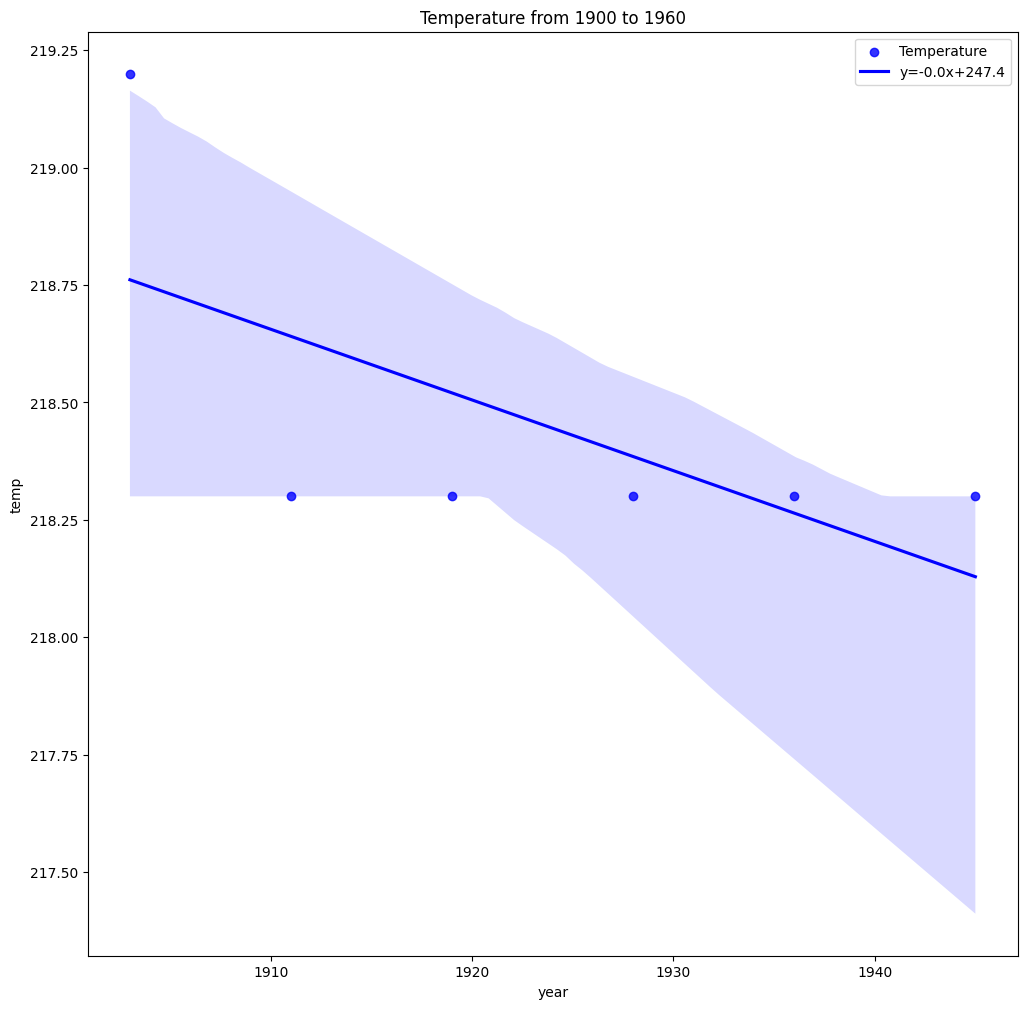

In [30]:
# to mask nan values so slope can be calculated
# https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(temp_CO2_from_1900to1960['year']) & ~np.isnan(temp_CO2_from_1900to1960['temp'])
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(temp_CO2_from_1900to1960['year'][mask],temp_CO2_from_1900to1960['temp'][mask])

# to plot a regression plot of Temperature and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
sns.regplot(x="year", y="temp", data=temp_CO2_from_1900to1960, color="b", ax=ax1, label="Temperature", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope3,intercept3)})
plt.title("Temperature from 1900 to 1960")
ax1.legend()

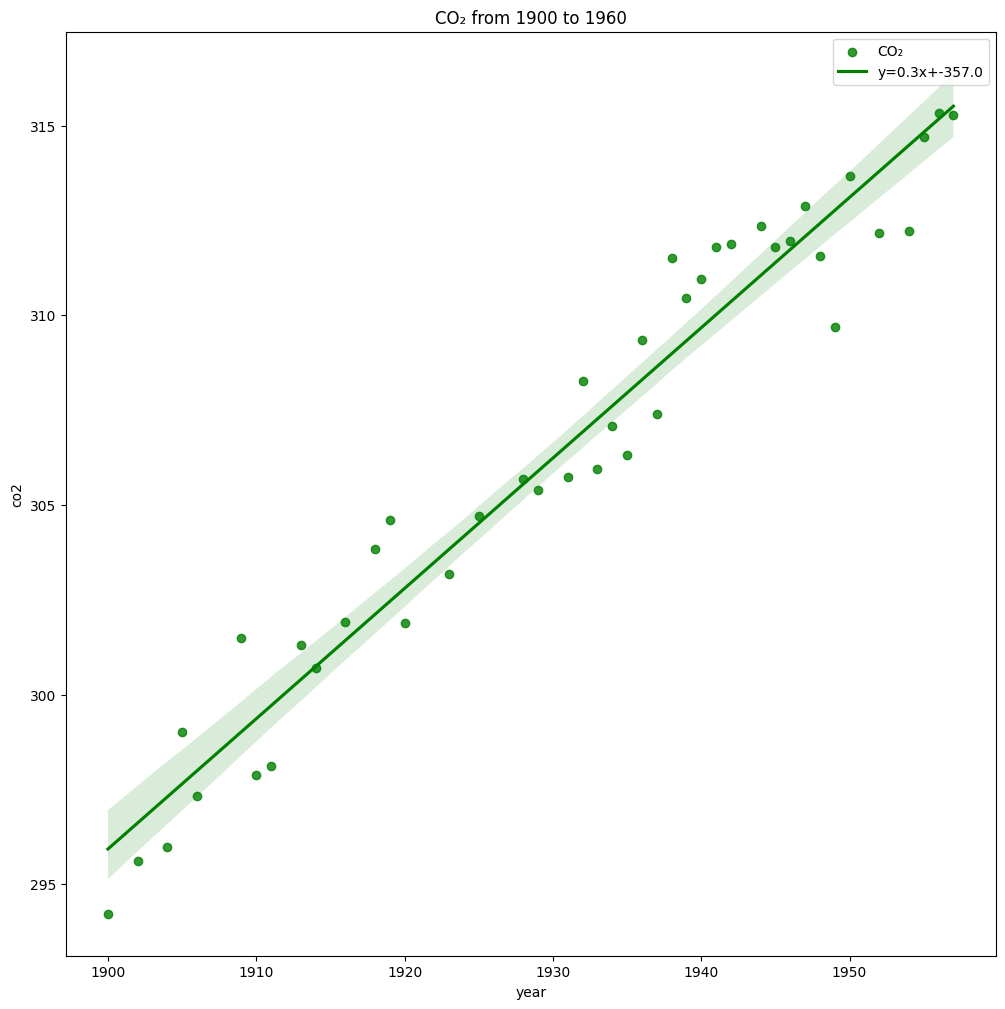

In [31]:
mask = ~np.isnan(temp_CO2_from_1900to1960['year']) & ~np.isnan(temp_CO2_from_1900to1960['co2'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(temp_CO2_from_1900to1960['year'][mask],temp_CO2_from_1900to1960['co2'][mask])

# to plot a regression plot of Temperature and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
sns.regplot(x="year", y="co2", data=temp_CO2_from_1900to1960, color="g", ax=ax1, label="CO₂", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope4,intercept4)})
plt.title("CO₂ from 1900 to 1960")
ax1.legend()

## Irish Context

### Rainfall in Ireland

In [32]:
# to read in rainfall data for Ireland
# https://www.met.ie/climate/available-data/long-term-data-sets/
rainfall_ireland = pd.read_csv('CSV Files/rainfall_ireland.csv', dtype={'year': int})

In [33]:
# to print the first 5 rows of the dataframe
rainfall_ireland.head()

,Year,Month,Rainfall
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6


In [224]:
# Sort the dataset per month and year
rainfall_ireland = rainfall_ireland.sort_values(['Month', 'Year'])
rainfall_ireland = rainfall_ireland.reset_index().drop(['index'], axis=1)

In [35]:
# to create a list of mean values for each month of the year
mean_years = []
std_dict = {}
for m in range(1,13):
  #Calcule mu and std values
  mu = rainfall_ireland[rainfall_ireland.Month == m]['Rainfall'].mean()
  std = rainfall_ireland[rainfall_ireland.Month == m]['Rainfall'].std()
  #Save mu and std values
  mean_years.append(mu)
  std_dict[m] = std

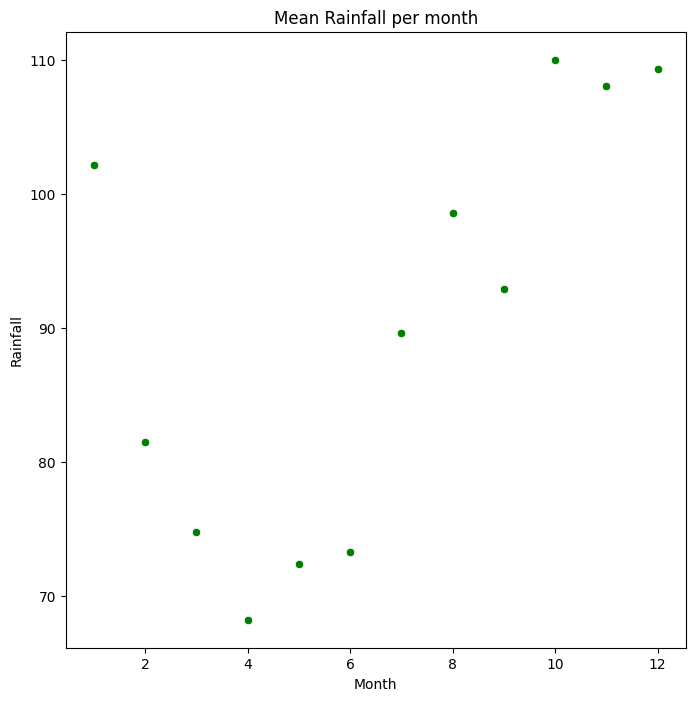

In [36]:
# to convert the mean values to a dataframe
df_mean_years = pd.DataFrame(mean_years)
df_mean_years['Month'] = range(1, 13)
df_mean_years.columns = ['Rainfall', 'Month']
# to plot the mean rainfall data for each month of the year
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Month', y='Rainfall', data=df_mean_years,  color='green', sizes=20).set(title='Mean Rainfall per month')
plt.show()

In [37]:
# to create a list of mean rainfall data for each year
ireland_rainfall_mean = []
std_dict = {}
for y in range(1711, 2016):
  #Calcule mu and std values
  mu = rainfall_ireland[rainfall_ireland.Year == y]['Rainfall'].mean()
  std = rainfall_ireland[rainfall_ireland.Year == y]['Rainfall'].std()
  #Save mu and std values
  ireland_rainfall_mean.append(mu)
  std_dict[y] = std

In [38]:
#Compute Rainfall anomalies
def anomaliesRainfall(rainfall_ireland):
  #Calcule mean by months from 1981-2010
  df_300y_rainfall = rainfall_ireland.query('1711 <= Year <= 2016')
  df_300y_rainfall = df_300y_rainfall.reset_index().drop(['index'], axis=1)
  mean_300y_rainfall = []
  for m in range(1,13):
    mu = rainfall_ireland[rainfall_ireland.Month == m]['Rainfall'].mean()
    mean_300y_rainfall.append(mu)

  #Compute rainfall anomalies
  anomalies_rainfall_list = []
  for s in range(0, len(rainfall_ireland)):
    mean_300y_rainfall_index = rainfall_ireland.loc[s, 'Month']-1
    #Calculate anomalies
    anomalies_rainfall = rainfall_ireland.loc[s, 'Rainfall'] - mean_300y_rainfall[mean_300y_rainfall_index]
    anomalies_rainfall = anomalies_rainfall/mean_300y_rainfall[mean_300y_rainfall_index]*100
    #Save anomalies
    anomalies_rainfall_list.append(anomalies_rainfall)
  rainfall_ireland['AnomaliesRainfall'] = anomalies_rainfall_list
  return rainfall_ireland, mean_300y_rainfall

df_rainfall, mean_300y_rainfall = anomaliesRainfall(rainfall_ireland)

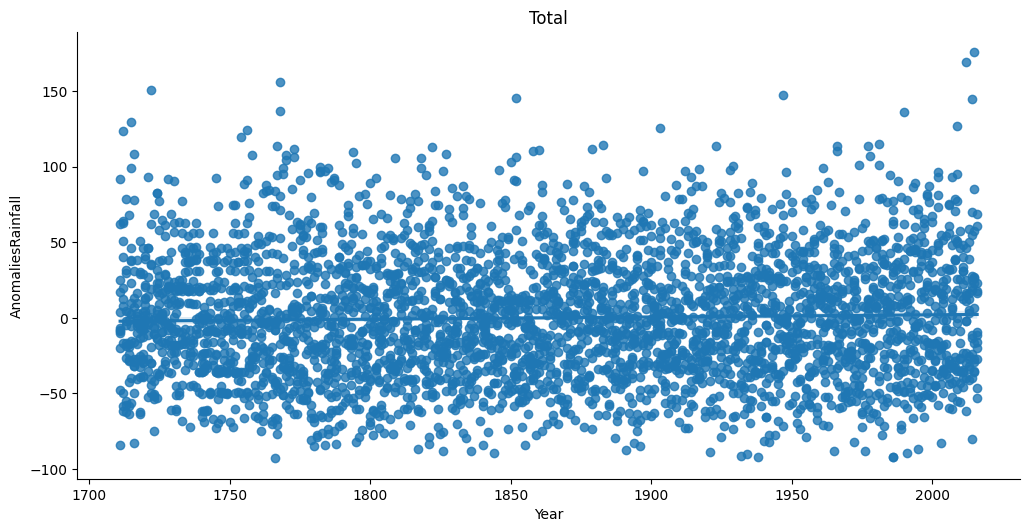

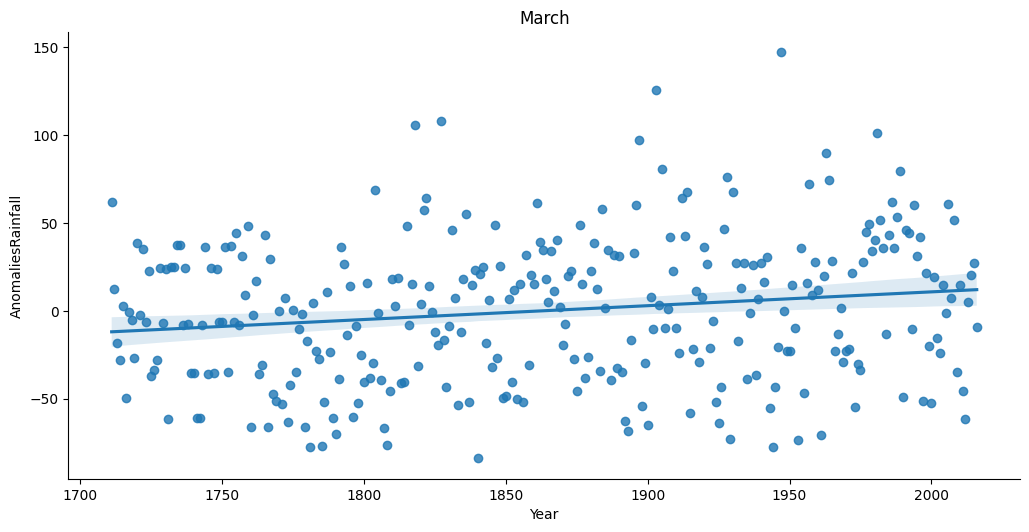

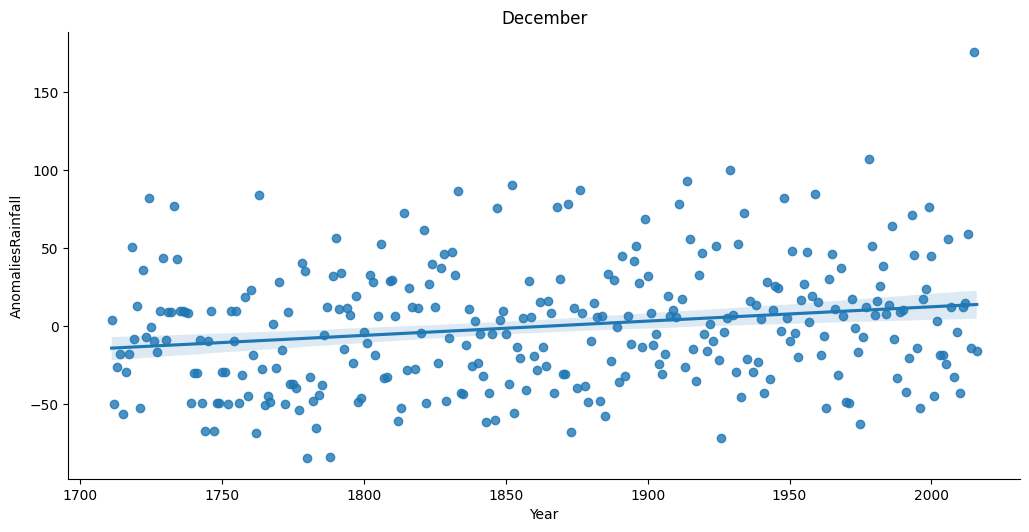

In [39]:
df_rainfall['Year'] = pd.to_numeric(df_rainfall['Year'])
# to plot rainfall anomalies
sns.lmplot(x='Year', y='AnomaliesRainfall', data=df_rainfall, height=5.2, aspect=2).set(title='Total')
plt.show()
# to plot rainfal anomalies for March
sns.lmplot(x='Year', y='AnomaliesRainfall', data=df_rainfall[df_rainfall.Month == 3], height=5.2, aspect=2).set(title='March')
plt.show()
# to plot rainfal anomalies for December
sns.lmplot(x='Year', y='AnomaliesRainfall', data=df_rainfall[df_rainfall.Month == 12], height=5.2, aspect=2).set(title='December')
plt.show()

### Temperature in Ireland

In [173]:
# to read in csv files for temperature data in Ireland
# I took a dataset from north, south, east and west to create an overall dataset for temperature in Ireland
# https://www.met.ie/climate/available-data/long-term-data-sets/
west_ireland_temp = pd.read_csv('CSV Files/NUI-Galway_1851-1965.csv', encoding='ISO-8859-1',dtype={'year': int})
east_ireland_temp = pd.read_csv('CSV Files\Trinity-College-Dublin_1840-1959.csv', encoding='ISO-8859-1',dtype={'year': int})

west_ireland_temp = west_ireland_temp[['year', 'max_temp']]
east_ireland_temp = east_ireland_temp[['year', 'max_temp']]

In [41]:
malin_temp1 = pd.read_csv('CSV Files\Malin-Head_1885-1920.csv', encoding='ISO-8859-1',dtype={'year': int})
malin_temp2 = pd.read_csv('CSV Files\Malin-Head_1921-1955-data.csv', encoding='ISO-8859-1',dtype={'year': int})

In [42]:
malin_temp1 = malin_temp1[['year', 'max_temp']]
malin_temp2 = malin_temp2[['year', 'max_temp']]

north_ireland_temp = pd.concat([malin_temp1, malin_temp2])
north_ireland_temp.sort_values(by=['year'], ascending=True);

In [43]:
roches_temp1 = pd.read_csv('CSV Files\Roches-Point_1872-1920.csv', encoding='ISO-8859-1',dtype={'year': int})
roches_temp2 = pd.read_csv('CSV Files\Roches-Point_1921-1956.csv', encoding='ISO-8859-1',dtype={'year': int})

In [44]:
roches_temp1 = roches_temp1[['year', 'max_temp']]
roches_temp2 = roches_temp2[['year', 'max_temp']]

south_ireland_temp = pd.concat([roches_temp1, roches_temp2])
south_ireland_temp.sort_values(by=['year'], ascending=True);

In [166]:
all_ireland_temp = pd.concat([west_ireland_temp, east_ireland_temp, north_ireland_temp, south_ireland_temp])
all_ireland_temp.sort_values(by=['year'], ascending=True);

In [158]:
# to calculate max temperature
ireland_temp_max = []
std_dict = {}
for y in range(1851, 1956):
  #Calcule mu and std values
  mu = all_ireland_temp[all_ireland_temp.year == y]['max_temp'].max()
  #Save mu value
  ireland_temp_max.append(mu)

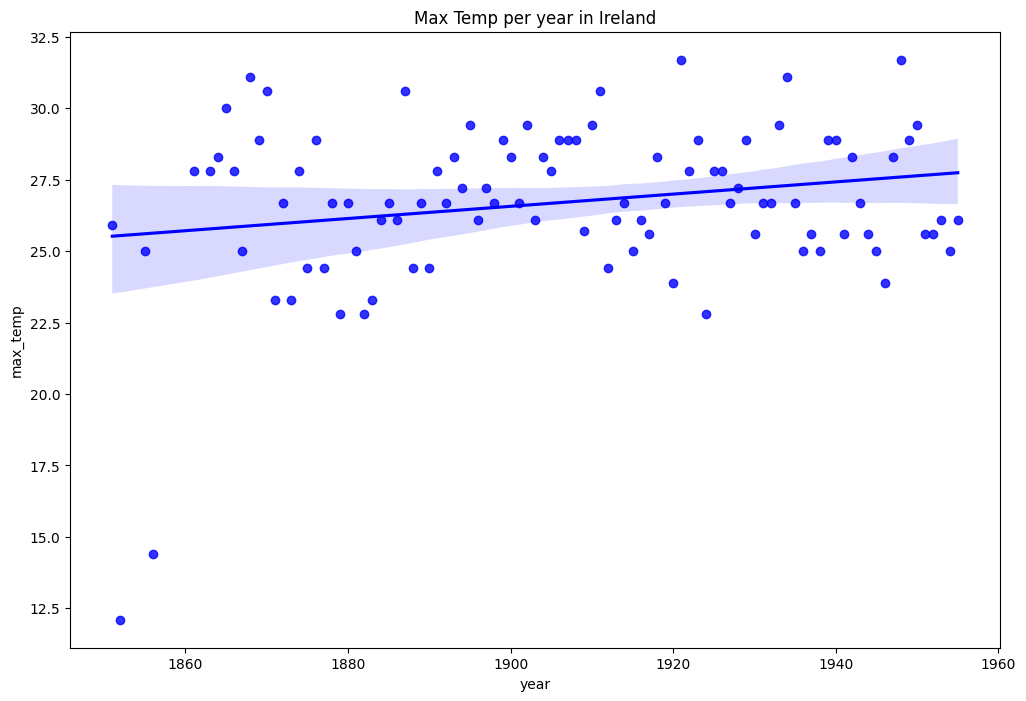

In [159]:
# to plot max temperature
df_ireland_temp_max = pd.DataFrame(ireland_temp_max)
df_ireland_temp_max['year'] = range(1851, 1956)
df_ireland_temp_max.columns = ['max_temp', 'year']
plt.figure(figsize=(12, 8))
sns.regplot(x = "year", y = "max_temp", data = df_ireland_temp_max, color='blue').set(title='Max Temp per year in Ireland')
plt.show()

In [163]:
# to calculate mean temperature
ireland_temp_mean = []
std_dict = {}
for y in range(1851, 1957):
  #Calcule mu and std values
  mu = all_ireland_temp[all_ireland_temp.year == y]['max_temp'].mean()
  std = all_ireland_temp[all_ireland_temp.year == y]['max_temp'].std()
  #Save mu and std values
  ireland_temp_mean.append(mu)
  std_dict[y] = std

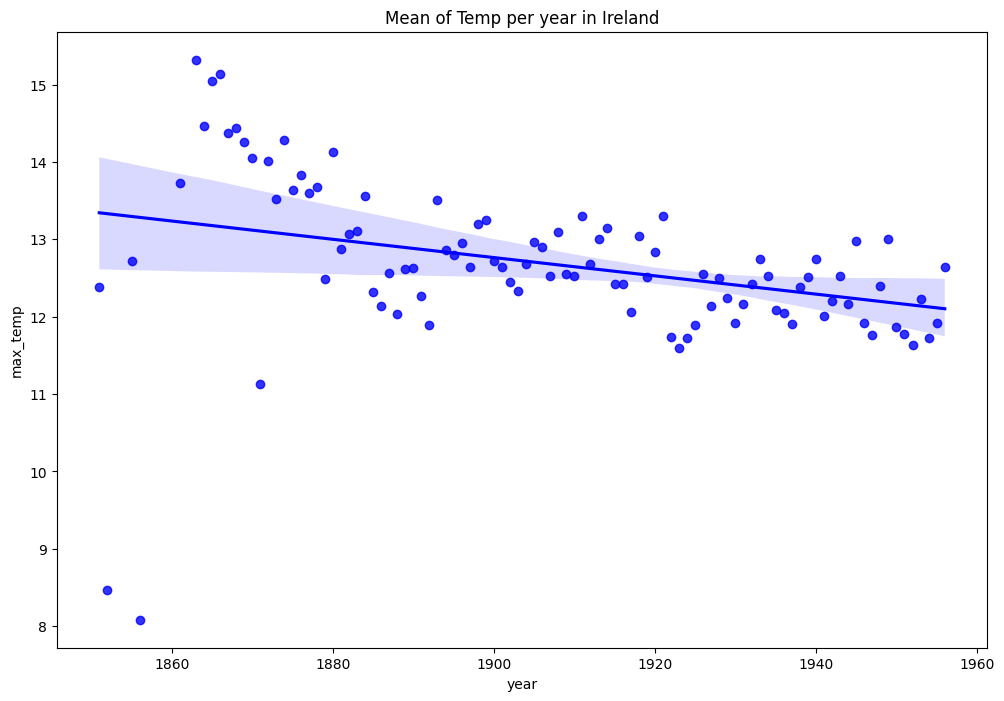

In [165]:
# to plot mean temperature
df_ireland_temp_mean = pd.DataFrame(ireland_temp_mean)
df_ireland_temp_mean['year'] = range(1851, 1957)
df_ireland_temp_mean.columns = ['max_temp', 'year']
plt.figure(figsize=(12, 8))
sns.regplot(x = "year", y = "max_temp", data = df_ireland_temp_mean, color='blue').set(title='Mean of Temp per year in Ireland')
plt.show()

In [174]:
# to read in a different dataset with updated temperature data for Ireland from 1900-2022
ireland_temp_updated = pd.read_csv('CSV Files\Temps_1900-2022_Ireland.csv', encoding='ISO-8859-1',dtype={'year': int})
ireland_temp_updated = ireland_temp_updated[['year', 'temp_ireland']]

### Plotting Temperature and Rainfall in Ireland

In [50]:
# to create a list of years from 1851-1956
years_temp = list(range(1851, 1957));

# to crate a dataframe of the years list and mean temperature in Ireland
ireland_meantemp = pd.DataFrame({'year': years_temp, 'temp_ireland': ireland_temp_mean})
ireland_meantemp.temp_ireland = ireland_meantemp.temp_ireland.round()
#ireland_temp.to_csv("ireland_temp.csv", encoding='utf-8', index=False)

# to crate a dataframe of the years list and max temperature in Ireland
ireland_maxtemp = pd.DataFrame({'year': years_temp, 'temp_ireland': ireland_temp_max})
ireland_maxtemp.temp_ireland = ireland_maxtemp.temp_ireland.round()

years_rainfall = list(range(1711, 2016));

# to crate a dataframe of the years list and mean rainfall in Ireland
ireland_rainfall = pd.DataFrame({'year': years_rainfall, 'rainfall_ireland': ireland_rainfall_mean})
ireland_rainfall.rainfall_ireland = ireland_rainfall.rainfall_ireland.round(2)

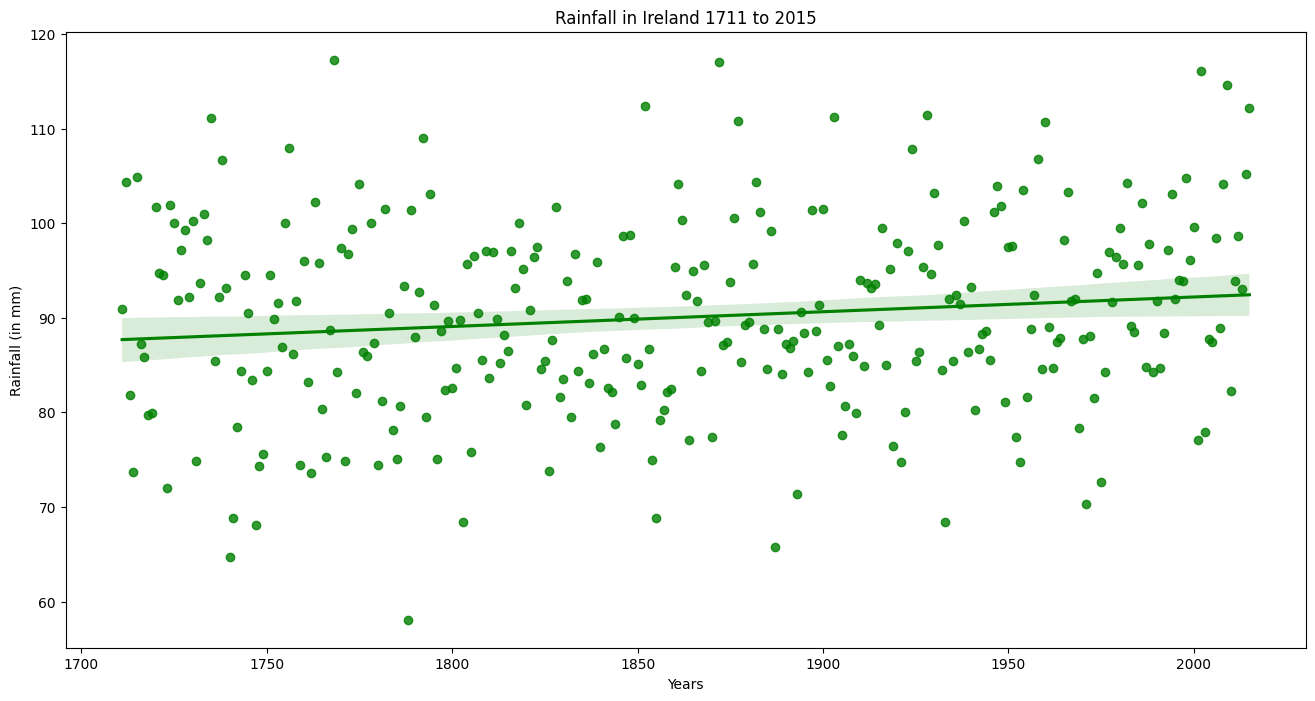

<Figure size 640x480 with 0 Axes>

In [51]:
# plotting rainfall in Ireland from 1711-2015
plt.figure(figsize=(16,8))
sns.regplot(x="year", y="rainfall_ireland", data=ireland_rainfall, color="g", label="Rainfall (mm)")
plt.xlabel('Years')
plt.ylabel('Rainfall (in mm)')
plt.title("Rainfall in Ireland 1711 to 2015")
plt.show()
plt.clf()

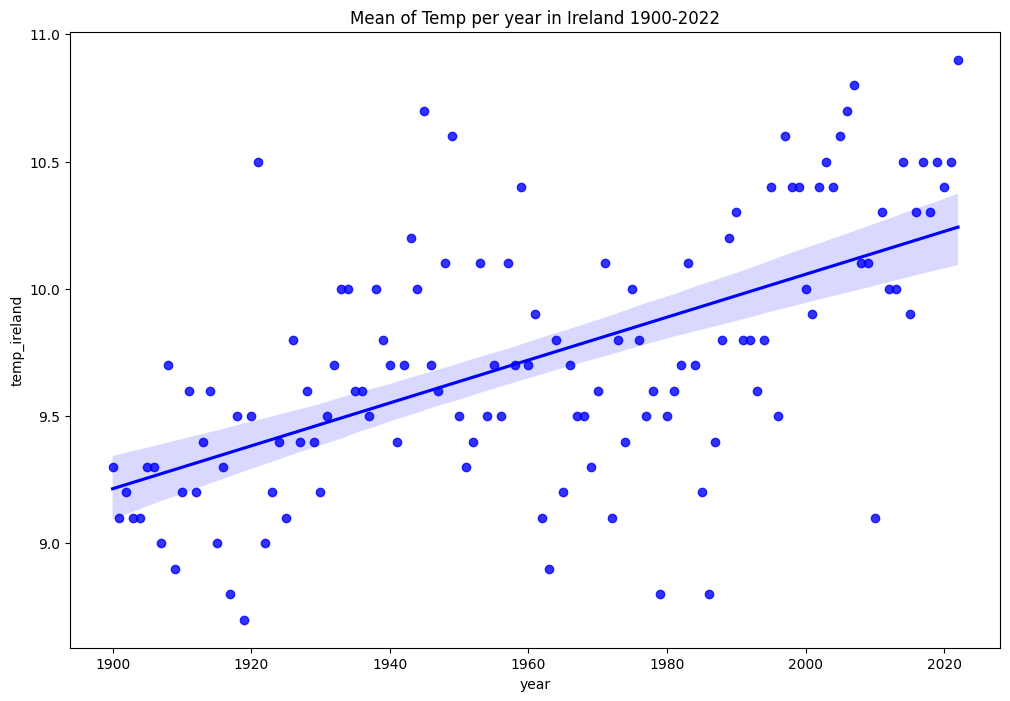

In [188]:
# to plot mean temperature data for Ireland from 1900-2022
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x = "year", y = "temp_ireland", data = ireland_temp_updated, color='blue').set(title='Mean of Temp per year in Ireland 1900-2022')
plt.show()

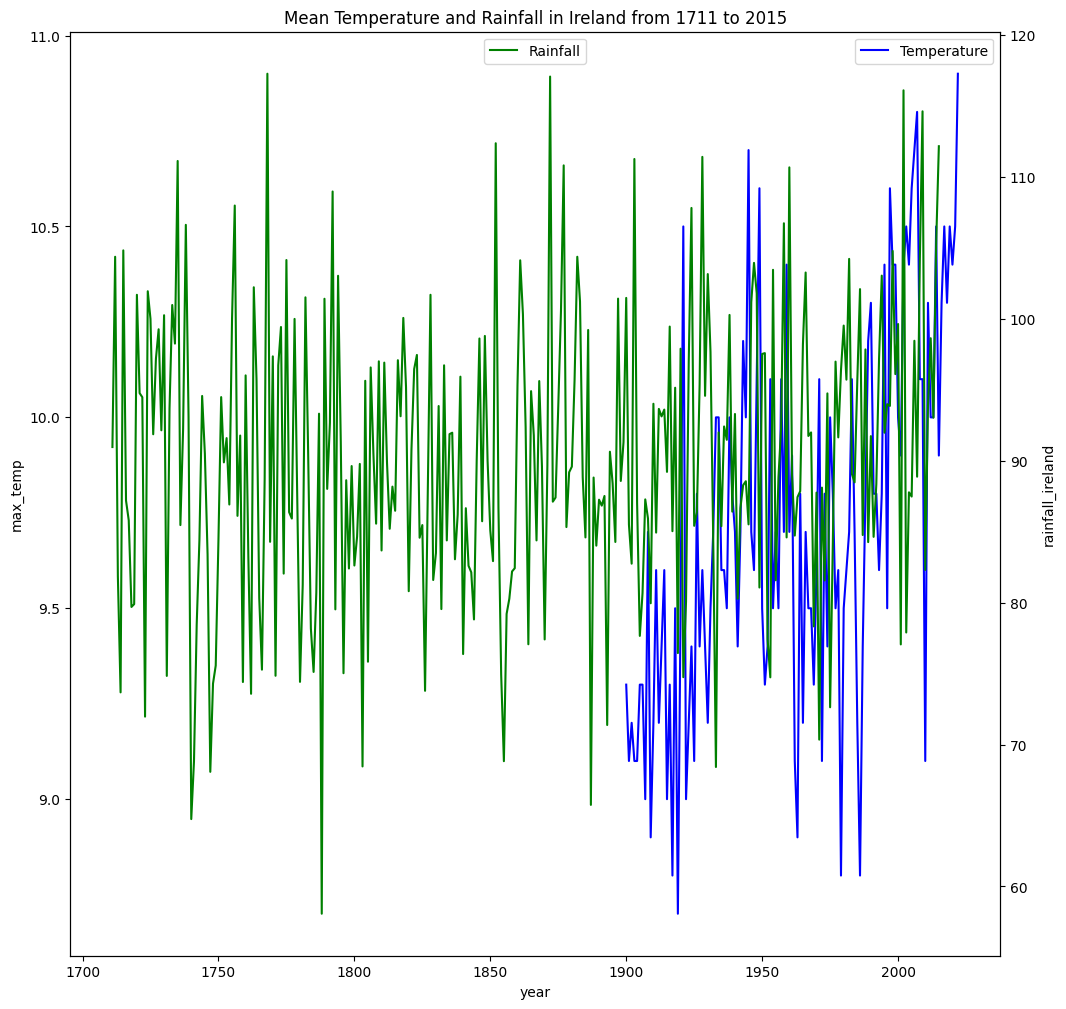

In [170]:
# plotting rainfall and mean temperature in Ireland
# no trends visible
fig, ax = plt.subplots(figsize=(12,12))
sns.lineplot(x="year", y="max_temp", data=ireland_temp_updated, color="b", label="Temperature")
ax2 = plt.twinx()
sns.lineplot(x="year", y="rainfall_ireland", data=ireland_rainfall, color="g", ax=ax2, label="Rainfall")
plt.title("Mean Temperature and Rainfall in Ireland from 1711 to 2015")
plt.legend(loc='upper center');

From the combined plot above, there appears to be no visible trend in terms of rainfall and temperature in Ireland using the data obtained in the analysis. The slight changes from year to year represent noise in the time series, which describes the variance and volatility of the measurements. 

However, looking at the individual line plots of temperature and rainfall, there does seem to be an upward trend as both temperature and rainfall are increasing.

Slope value?

## Combining Data into one Dataframe

In [54]:
# to combine global temperature, global CO₂, sea ice levels, ireland temperature and ireland rainfall into one dataframe
combined_data = temp_CO2_present.merge(df_seaice_mean, on='year', how='outer').merge(ireland_meantemp, on='year', how='outer').merge(ireland_rainfall, on='year', how='outer')
combined_data = combined_data.sort_values('co2', ascending=False).drop_duplicates('year').sort_index()
combined_data.sort_values(by=['year'], inplace=True, ascending=True);

# to save dataframe to csv and json
# https://stackoverflow.com/questions/49608656/saving-a-dataframe-to-csv-file-python
combined_data.to_csv('combined_data.csv', index=False)
combined_data.to_json('combined_data.json', orient='records', lines=False, indent=4)

### Data Analysis

In [55]:
# to display a table of descriptive statistics of the dataframe
combined_data.describe()

,year,temp,co2,sea_ice,temp_ireland,rainfall_ireland
count,8860.000000,5871.000000,2963.000000,41.000000,99.000000,305.000000
mean,-224049.577878,214.963763,233.870297,11.474634,12.727273,90.061541
std,231616.228990,15.354087,35.108064,0.674237,1.067308,10.096447
min,-818144.000000,207.900000,171.600000,10.180000,8.000000,58.080000
25%,-363744.000000,210.900000,205.495000,10.920000,12.000000,84.270000
50%,-127693.000000,212.900000,231.600000,11.690000,13.000000,89.600000
75%,-33575.250000,216.100000,252.900000,12.020000,13.000000,96.990000
max,2022.000000,418.530000,418.530000,12.470000,15.000000,117.280000


In [56]:
# to display the datatypes of the variables in the dataframe
combined_data.dtypes

year                  int64
temp                float64
co2                 float64
sea_ice             float64
temp_ireland        float64
rainfall_ireland    float64
dtype: object

In [57]:
# to calculate and display the correlation data for each of the variables (except year)
print('Correlation:')
correlations = combined_data.select_dtypes(exclude=[int])
correlations.corr().round(2) 

Correlation:


,temp,co2,sea_ice,temp_ireland,rainfall_ireland
temp,1.00,0.93,-0.95,-0.39,0.10
co2,0.93,1.00,-0.95,-0.66,0.31
sea_ice,-0.95,-0.95,1.00,NaN,-0.11
temp_ireland,-0.39,-0.66,NaN,1.00,-0.07
rainfall_ireland,0.10,0.31,-0.11,-0.07,1.00


As already visualised with the line graphs plotted above, there is a high level of correlation between temperature and CO₂ levels over the past 800 thousand years.

From the data displayed in the table above, the value of 0.93 for correlation between temperature and CO₂ levels indicate the two variables are linearly related. This means they change together at a constant rate. A value of +1 or-1 indicates complete correlation, while a value of 0 indicates complete absence of correlation. The closer the correlation value is to 1, the greataer the correlation is between the variables.

### Distribution of the Variables

- Histograms

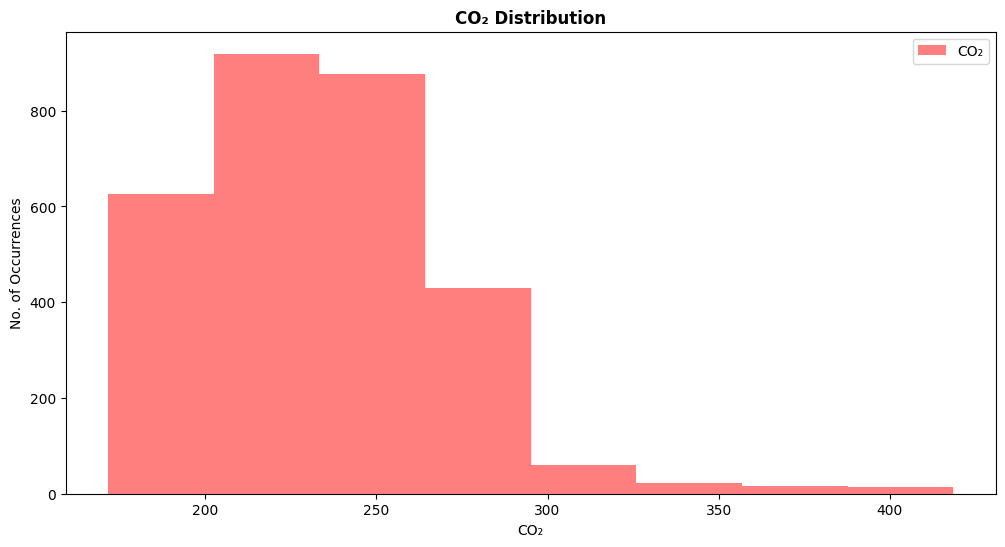

In [58]:
# Plot a Histogram for CO₂ Distribution

fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("CO₂ Distribution", fontweight='bold') # to set the title of the plot
ax.set(xlabel='CO₂')    # to set the x axis title
ax.set(ylabel="No. of Occurrences") # to set the y axis title
ax.hist(combined_data['co2'], bins=8, alpha=0.5, label="CO₂", color='red')  # to plot a histogram of CO₂ distribution
ax.legend(loc='upper right'); # to place the legend of the plot in the upper right

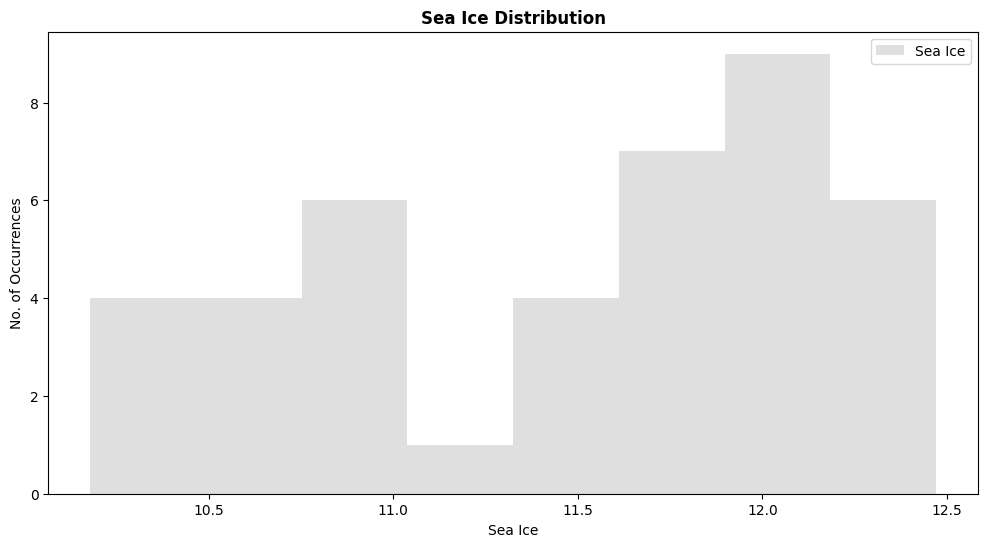

In [59]:
# Plot a Histogram for Sea Ice Distribution

fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("Sea Ice Distribution", fontweight='bold') # to set the title of the plot
ax.set(xlabel='Sea Ice')    # to set the x axis title
ax.set(ylabel="No. of Occurrences") # to set the y axis title
ax.hist(combined_data['sea_ice'], bins=8, alpha=0.5, label="Sea Ice", color='silver')  # to plot a histogram of sea ice distribution
ax.legend(loc='upper right'); # to place the legend of the plot in the upper right

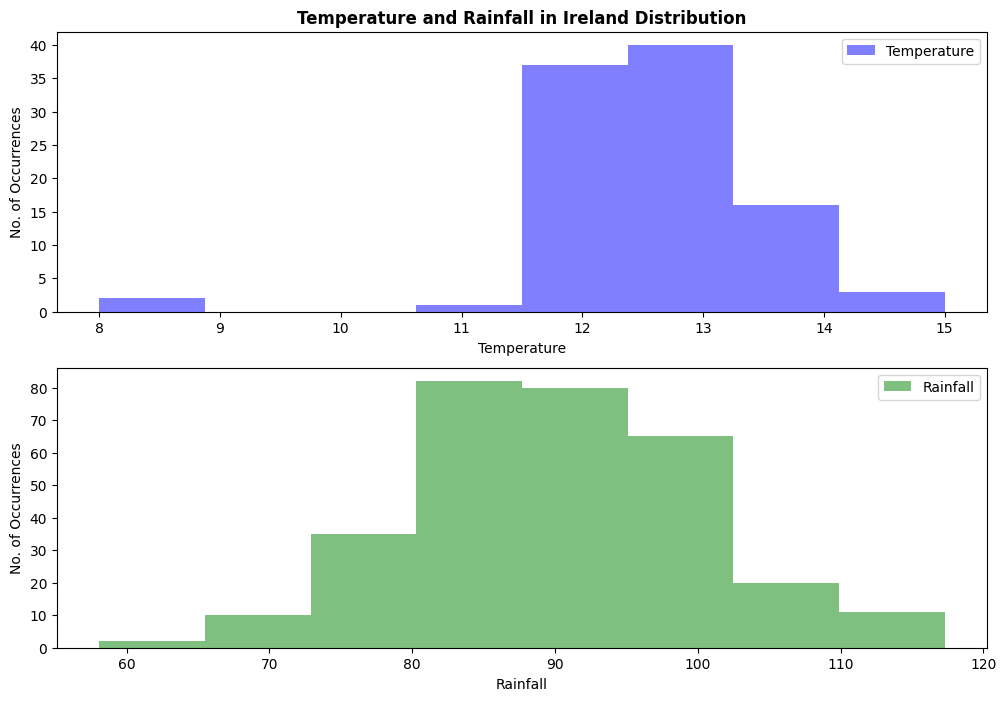

In [60]:
# Plot a Histogram for Temperature and Rainfall in Ireland Distribution

fig, axes = plt.subplots(2, figsize = (12,8))  # to create two vertically stacked subplots

axes[0].set_title("Temperature and Rainfall in Ireland Distribution", fontweight='bold')
axes[0].set(xlabel='Temperature')
axes[0].set(ylabel="No. of Occurrences")
axes[0].hist(combined_data['temp_ireland'], bins=8, alpha=0.5, label="Temperature", color='blue')
axes[0].legend(loc='upper right')

axes[1].set(xlabel='Rainfall')
axes[1].set(ylabel="No. of Occurrences")
axes[1].hist(combined_data['rainfall_ireland'], bins=8, alpha=0.5, label="Rainfall", color='green')
axes[1].legend(loc='upper right')

Epica dc determined CO2 and temperature data from ice cores - the temperature is inferred from the isotopic composition of the water molecules released by melting the ice cores.

For this reason, it is difficult to compare the temperature data collected for Ireland to the over 800 thousand years of data collected worldwide.
I have searched online for ways to compare this data to degrees Celsius, however I havent been able to find anything concrete on this matter.

https://www.scientificamerican.com/article/how-are-past-temperatures/

- Pairplots

In [61]:
# to create a dataframe excluding the year variable
combined_2 = combined_data[['temp', 'co2', 'sea_ice', 'temp_ireland', 'rainfall_ireland']]

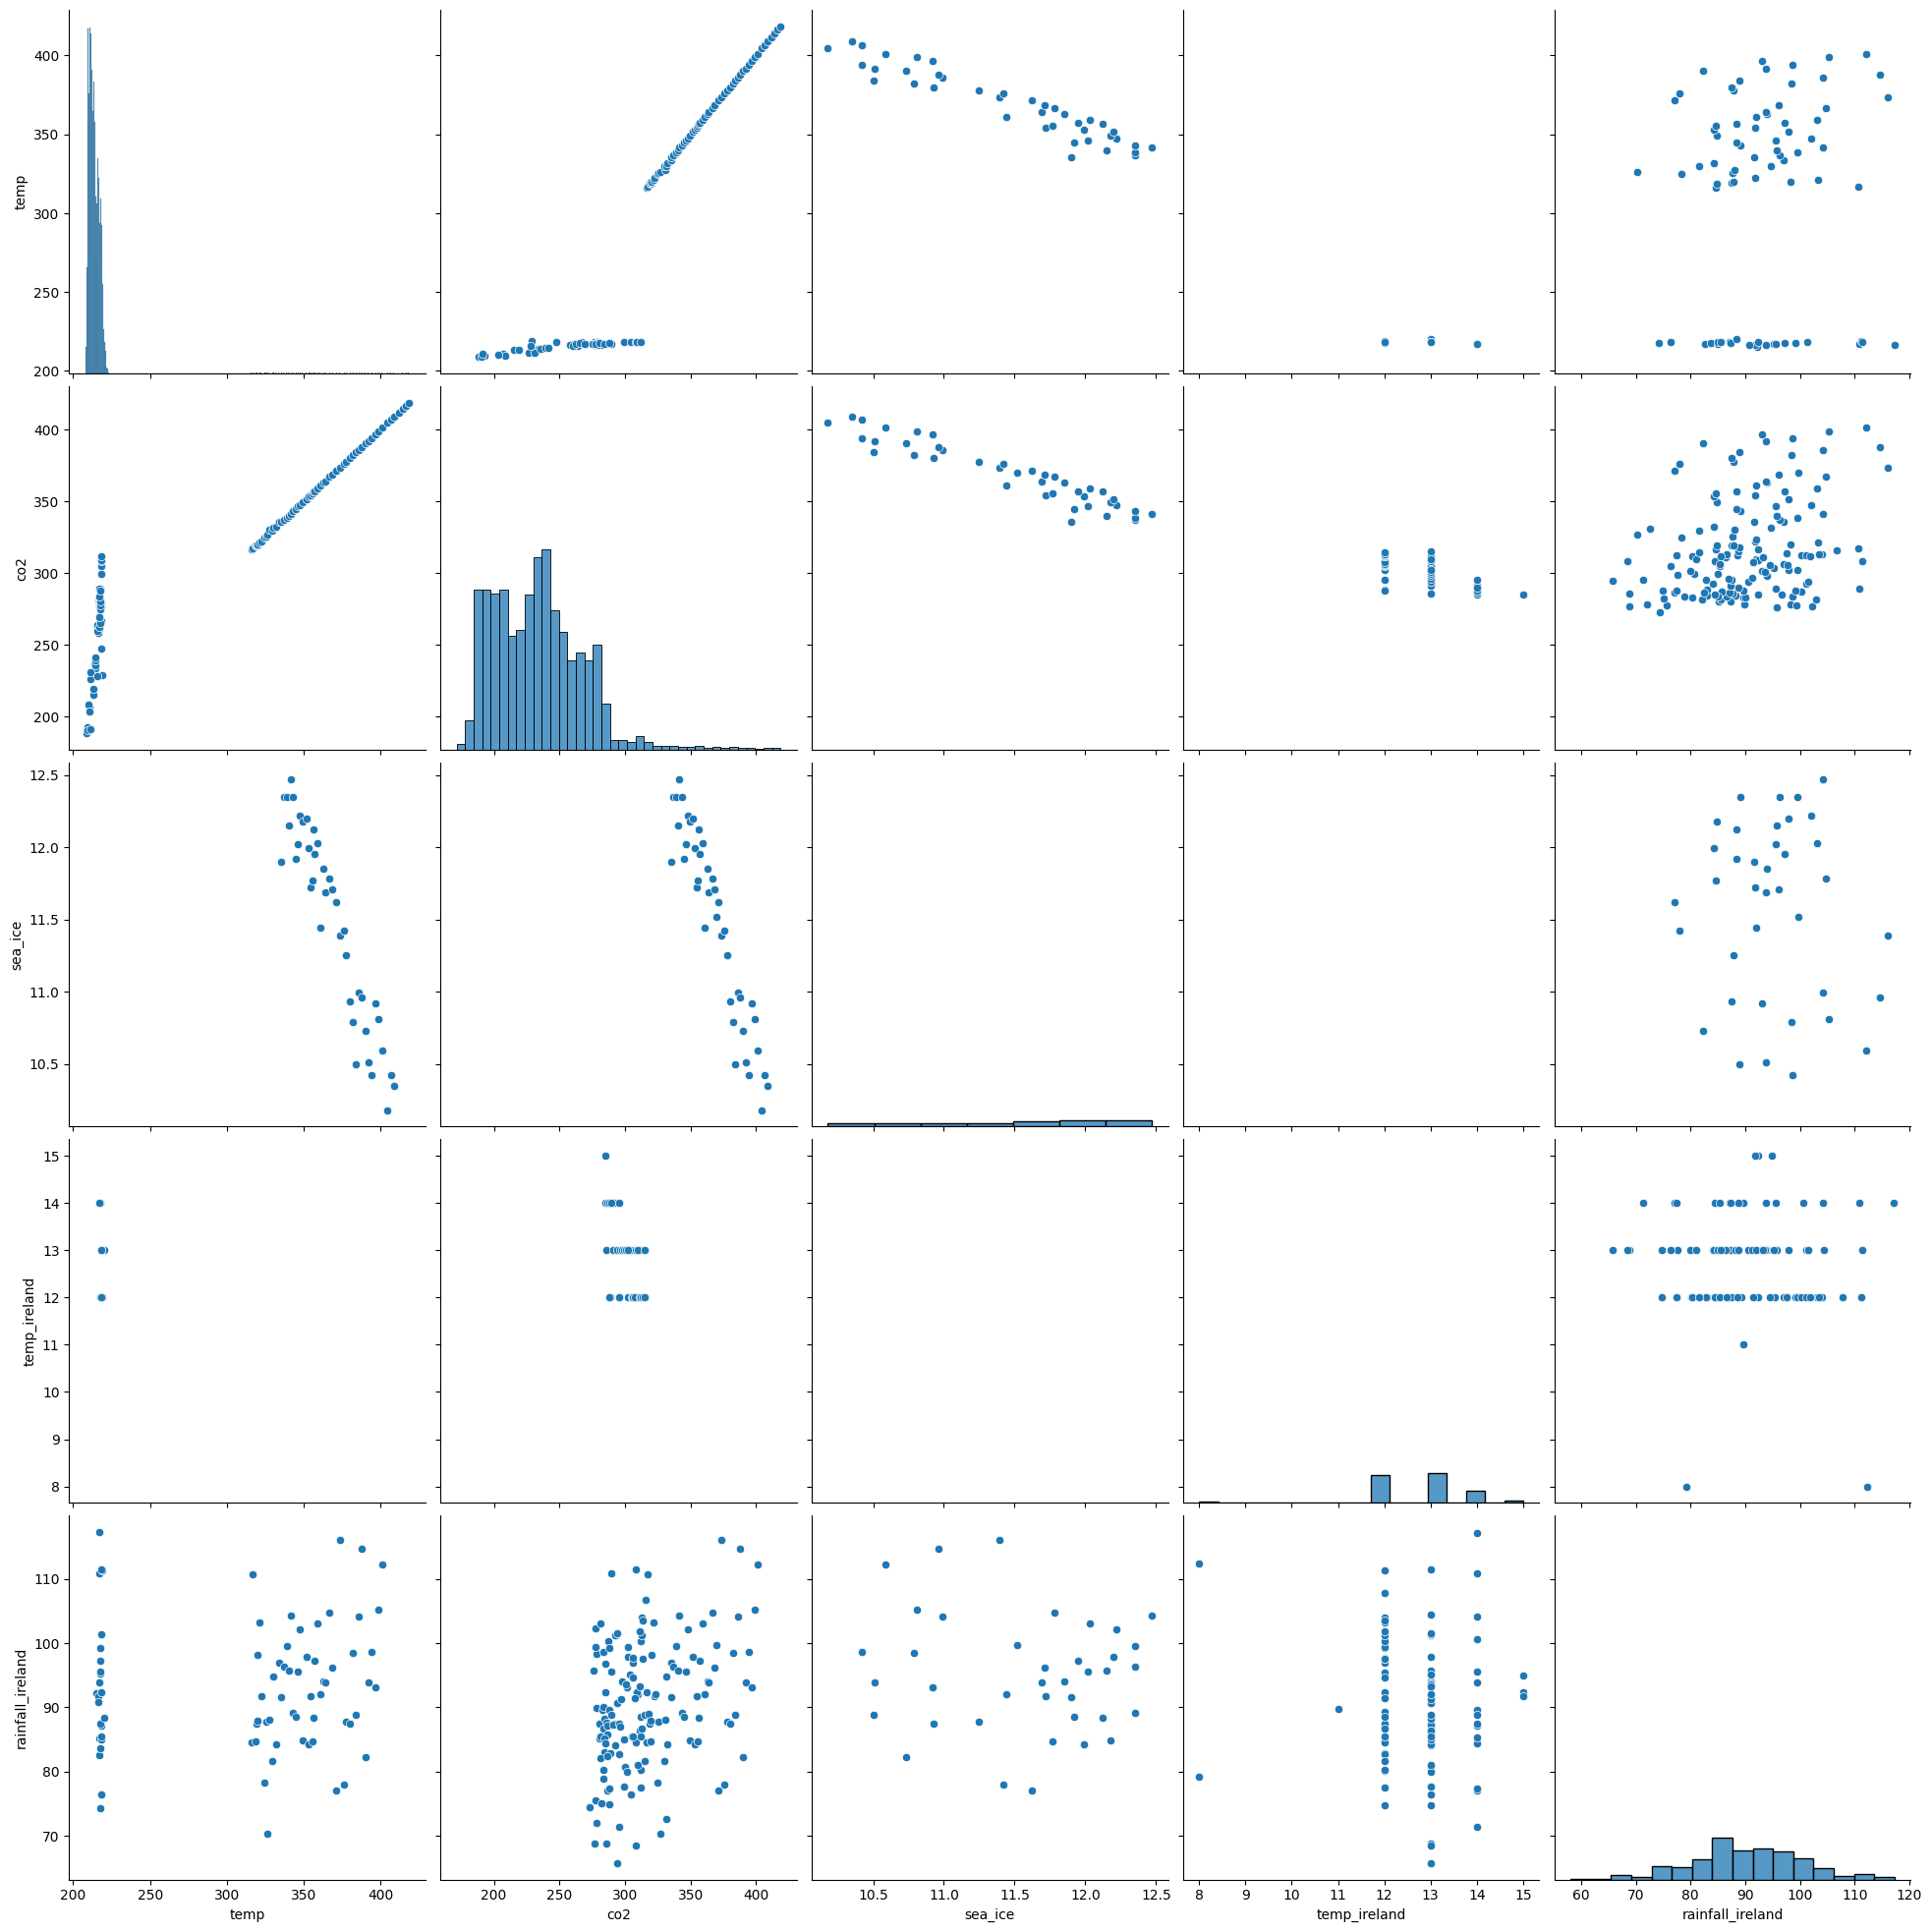

In [62]:
# a pairplot using the seaborn module, to display distributions of the variables in the dataset
sns.pairplot(combined_2, height=4, palette=['blue', 'purple', 'blueviolet'])

- Boxplots

Text(0.5, 1.0, 'Boxplots of Temperature and CO₂')

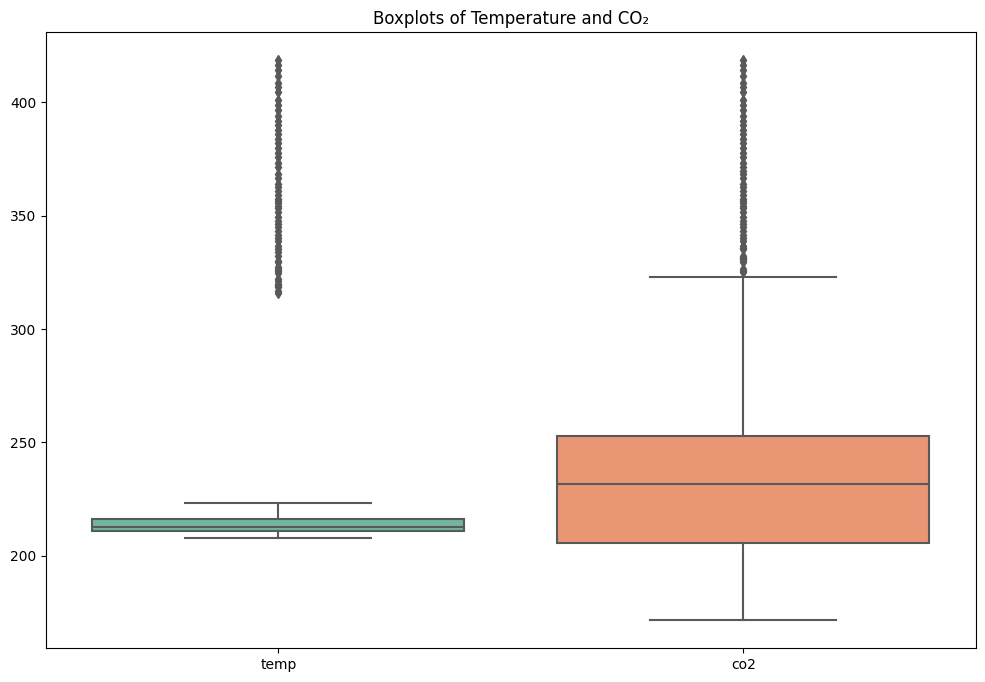

In [225]:
# plotting a boxplot of temperature and CO₂

fig, ax = plt.subplots(figsize=(12,8))
df2 = combined_data[['temp', 'co2']]
ax = sns.boxplot(data=df2, orient="v", palette="Set2")  # to create a boxplot using seaborn
ax.set_title("Boxplots of Temperature and CO₂")
# https://stackoverflow.com/questions/66833728/boxplots-with-seaborn-for-all-variables-in-a-dataset-at-once

Text(0.5, 1.0, 'Boxplots of Temperature and Rainfall in Ireland')

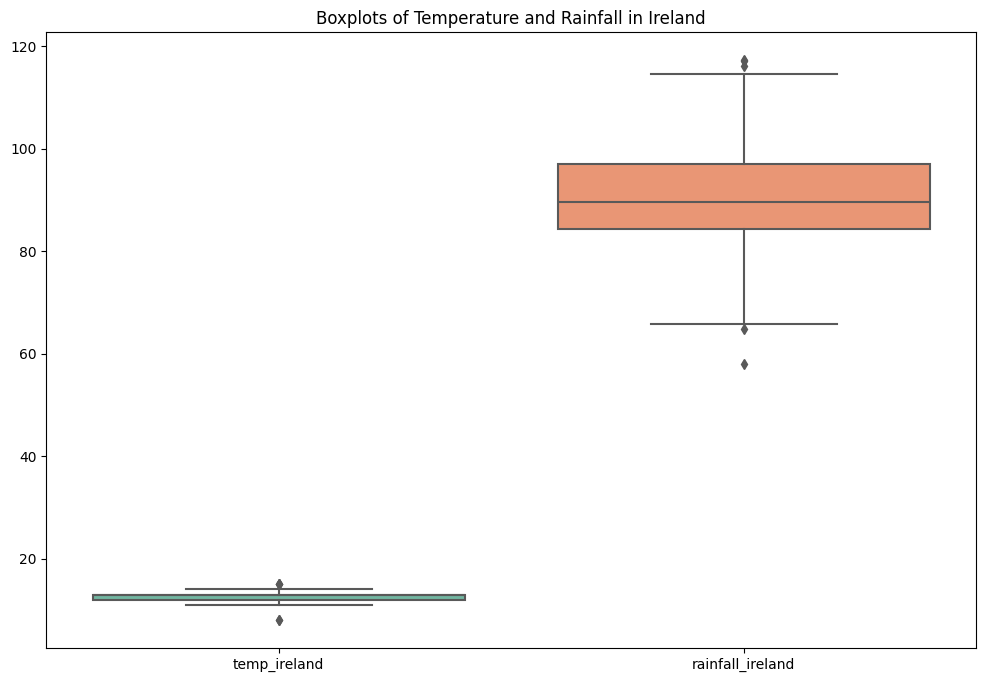

In [64]:
# plotting a boxplot of temperature and Rainfall in Ireland
fig, ax = plt.subplots(figsize=(12,8))
df3 = combined_data[['temp_ireland', 'rainfall_ireland']]
ax = sns.boxplot(data=df3, orient="v", palette="Set2")  # to create a boxplot using seaborn
ax.set_title("Boxplots of Temperature and Rainfall in Ireland")

Text(0.5, 1.0, 'Boxplot of Sea Ice')

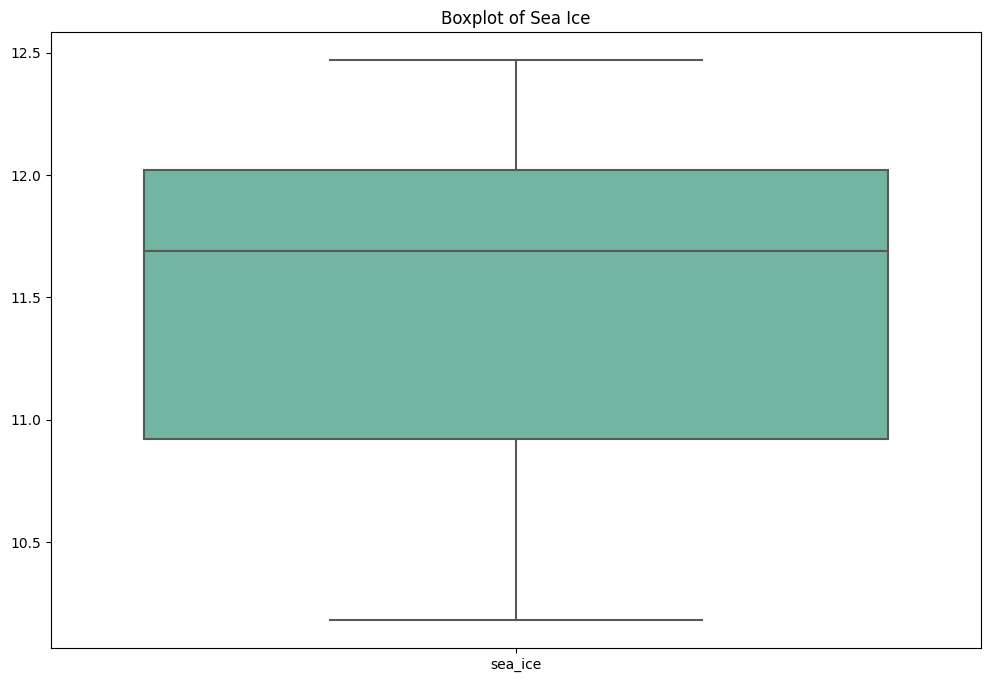

In [65]:
# plotting a boxplot ofsea ice extent
fig, ax = plt.subplots(figsize=(12,8))
df4 = combined_data[['sea_ice']]
ax = sns.boxplot(data=df4, orient="v", palette="Set2")  # to create a boxplot using seaborn
ax.set_title("Boxplot of Sea Ice")

### Comparing Temperature, CO₂ and Sea Ice

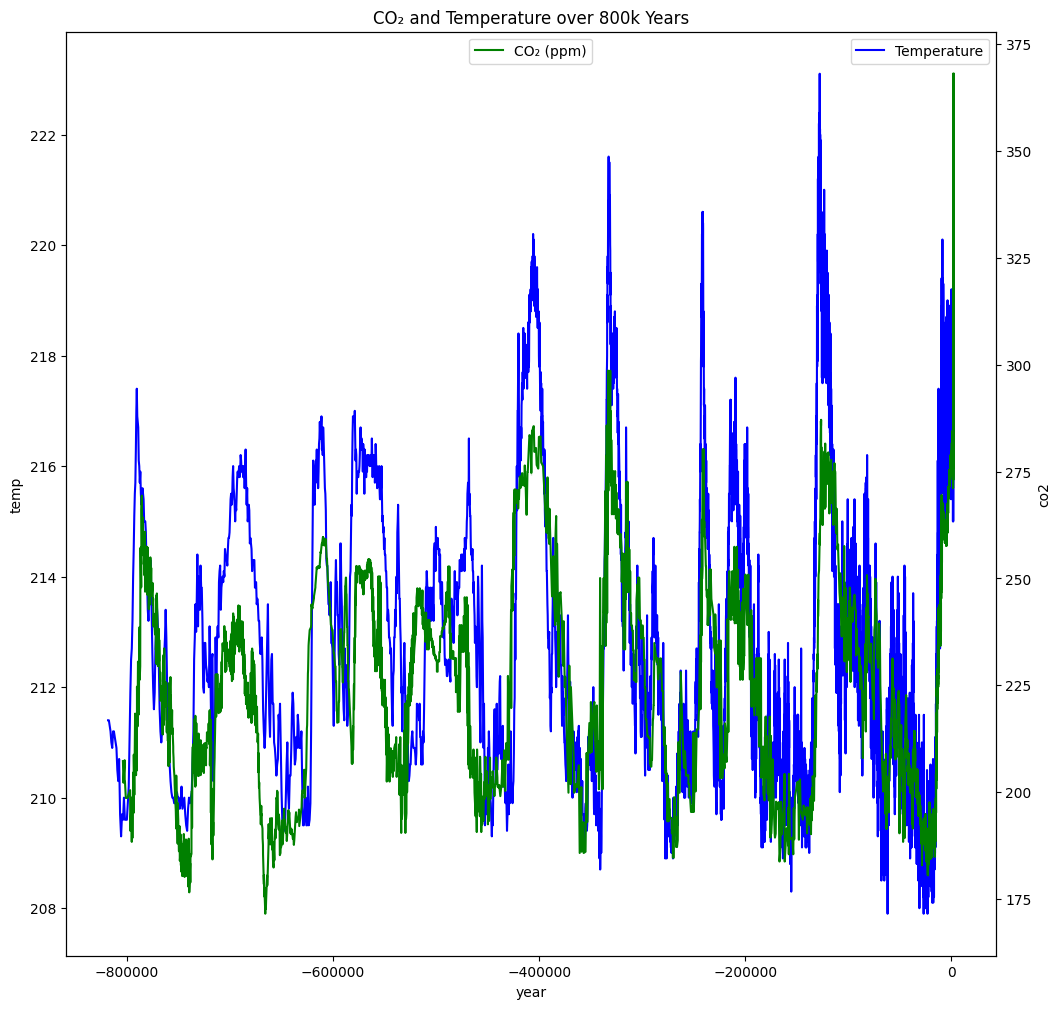

In [95]:
# to plot Temperature and CO₂ over 800k Years
fig, ax = plt.subplots(figsize=(12,12))
sns.lineplot(x="year", y="temp", data=temp_CO2, color="b", label="Temperature")
ax2 = plt.twinx()
sns.lineplot(x="year", y="co2", data=temp_CO2, color="g", ax=ax2, label="CO₂ (ppm)")
plt.title("CO₂ and Temperature over 800k Years")
plt.legend(loc='upper center')

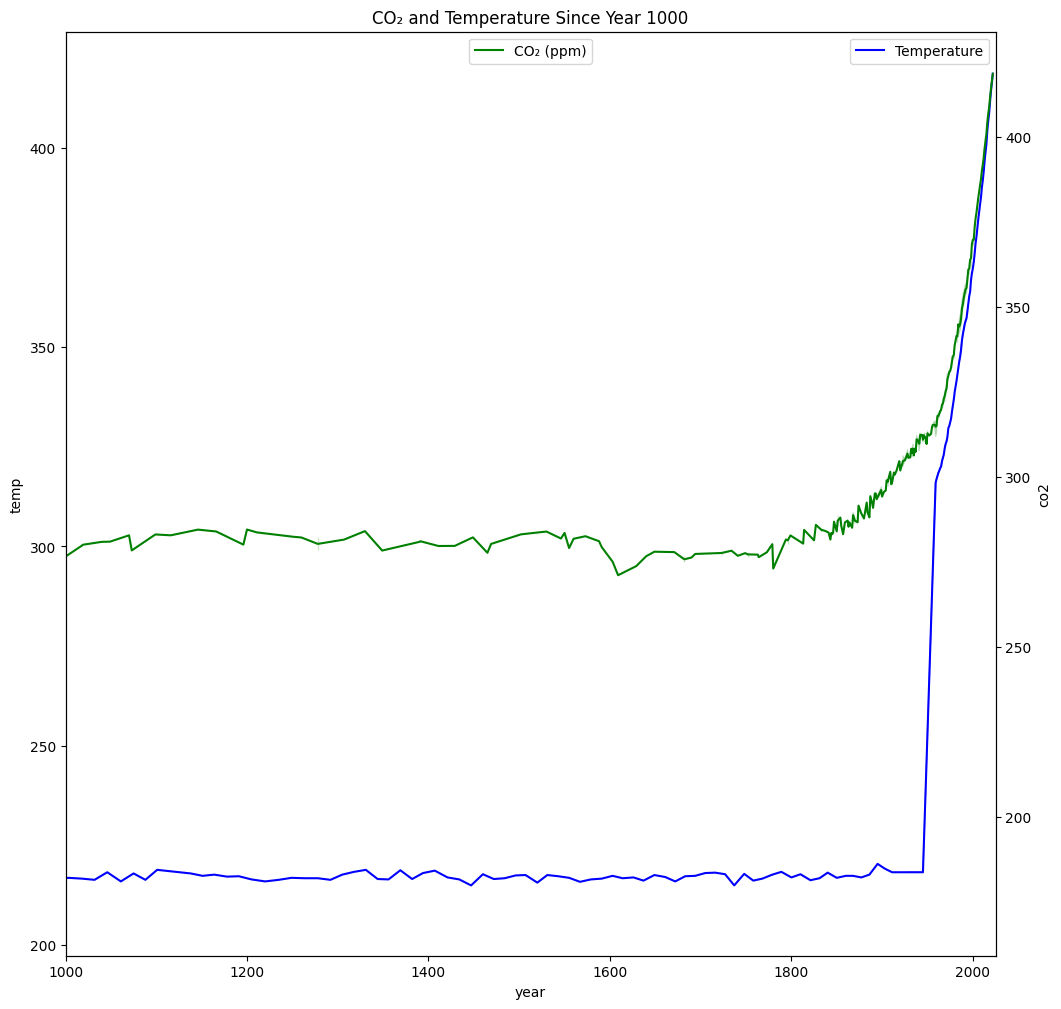

In [96]:
# to plot Temperature and CO₂ since the Year 1000
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="temp", data=temp_CO2_present, color="b", ax=ax1, label="Temperature")
sns.lineplot(x="year", y="co2", data=temp_CO2_present, color="g", ax=ax2, label="CO₂ (ppm)")
ax1.set_xlim(1000, 2025)
ax2.set_xlim(1000, 2025)
plt.title("CO₂ and Temperature Since Year 1000")
plt.legend(loc='upper center')

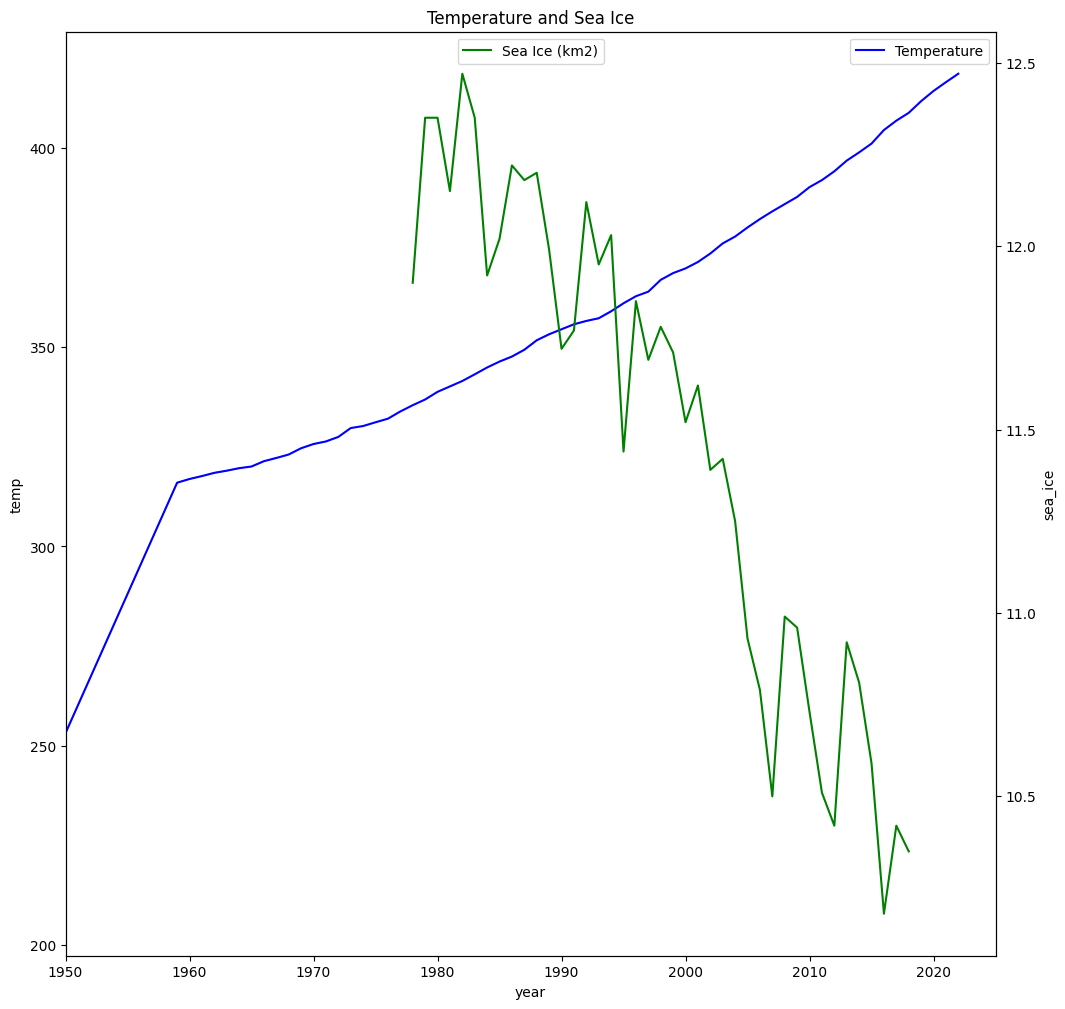

In [97]:
# to plot temperature vs sea ice
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="temp", data=temp_CO2_present, color="b", ax=ax1, label="Temperature")
sns.lineplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice (km2)")
ax1.set_xlim(1950, 2025)
ax2.set_xlim(1950, 2025)
plt.title("Temperature and Sea Ice")
plt.legend(loc='upper center')

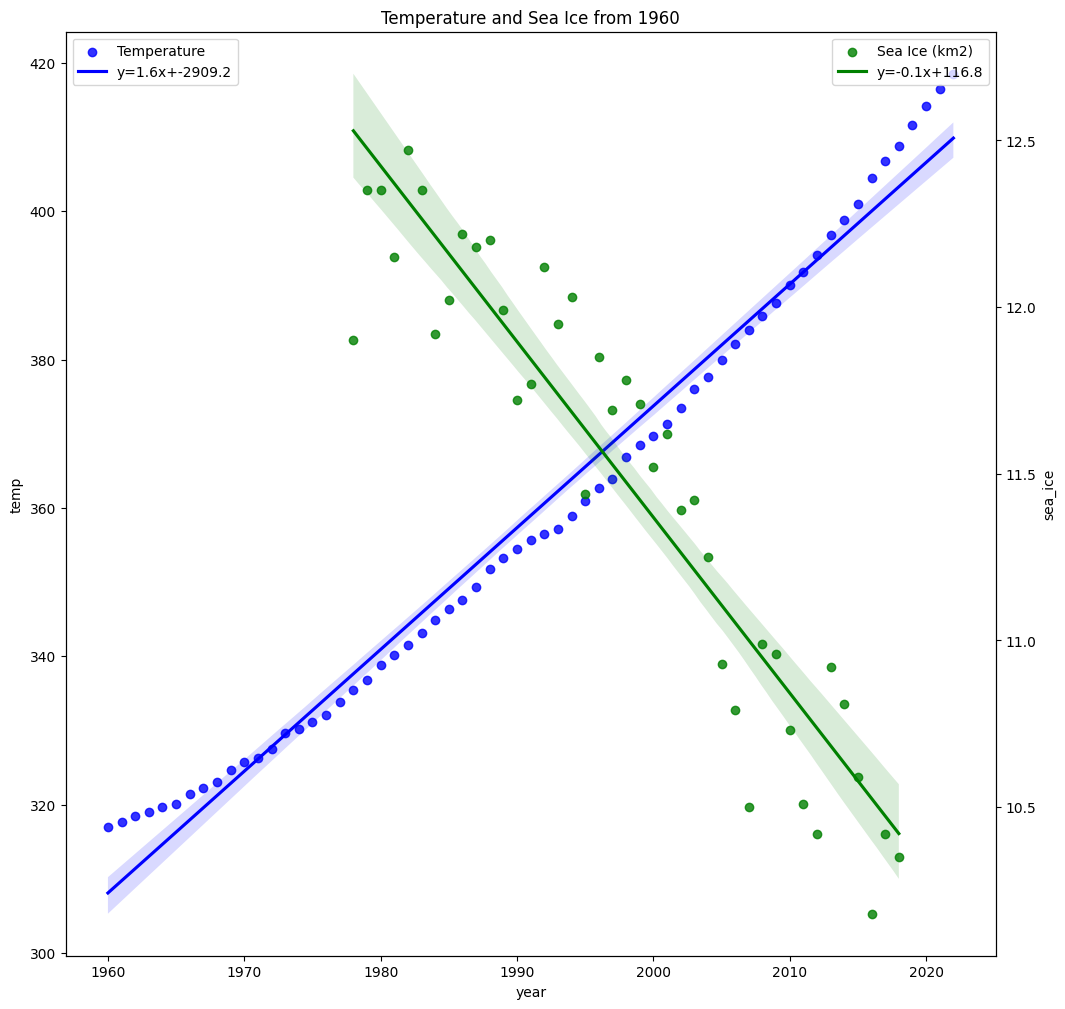

In [98]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_CO2_from_1960['year'],temp_CO2_from_1960['temp'])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df_seaice_mean['year'],df_seaice_mean['sea_ice'])

# to plot a regression plot of Temperature and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.regplot(x="year", y="temp", data=temp_CO2_from_1960, color="b", ax=ax1, label="Temperature", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
sns.regplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice (km2)", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
plt.title("Temperature and Sea Ice from 1960")
ax1.legend()
ax2.legend()

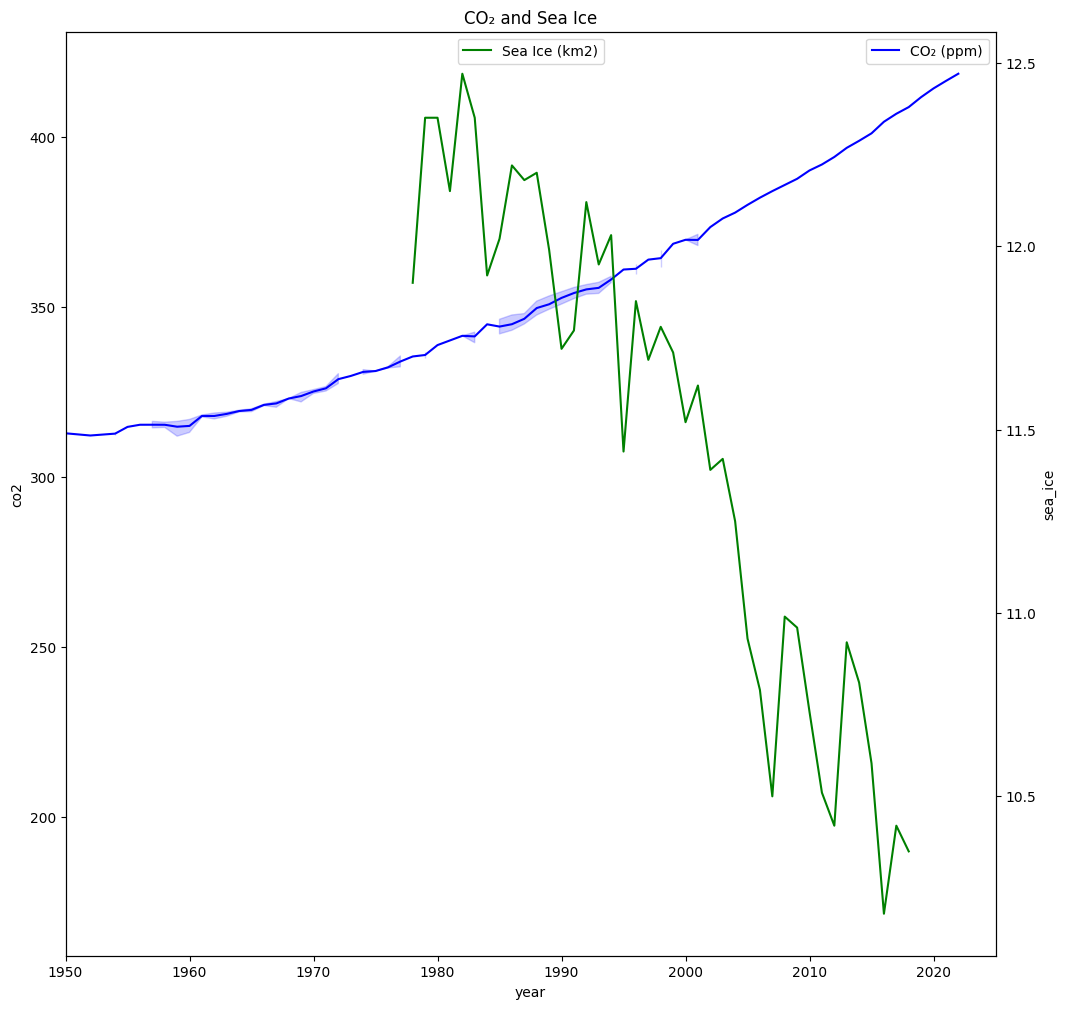

In [99]:
#to plot CO₂ and Sea Ice
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.lineplot(x="year", y="co2", data=temp_CO2_present, color="b", ax=ax1, label="CO₂ (ppm)")
sns.lineplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice (km2)")
ax1.set_xlim(1950, 2025)
ax2.set_xlim(1950, 2025)
plt.title("CO₂ and Sea Ice")
plt.legend(loc='upper center')

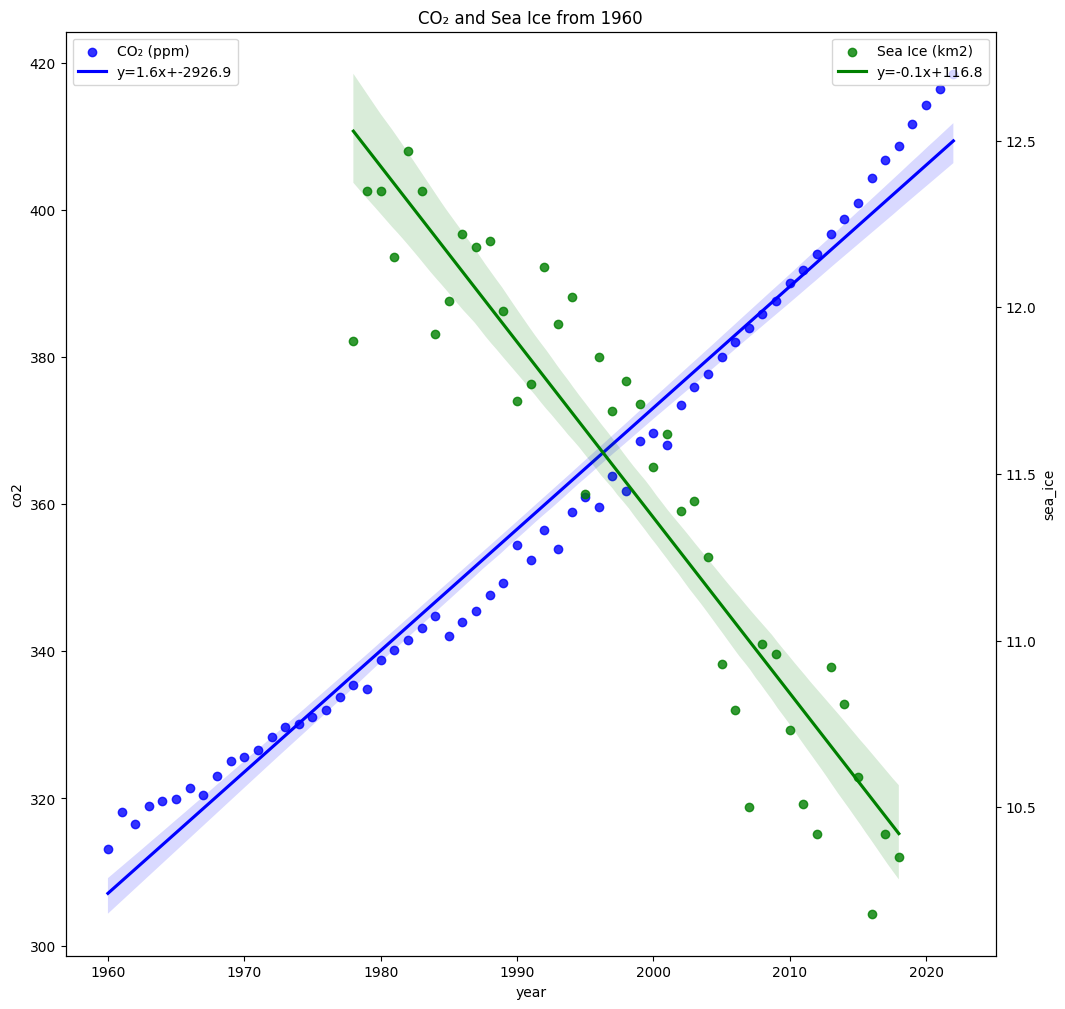

In [100]:
# get coeffs of linear fit
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(temp_CO2_from_1960['year'],temp_CO2_from_1960['co2'])

# to plot a regression plot of CO₂ and Sea Ice with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()
sns.regplot(x="year", y="co2", data=temp_CO2_from_1960, color="b", ax=ax1, label="CO₂ (ppm)", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
sns.regplot(x="year", y="sea_ice", data=df_seaice_mean, color="g", ax=ax2, label="Sea Ice (km2)", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
plt.title("CO₂ and Sea Ice from 1960")
ax1.legend()
ax2.legend()

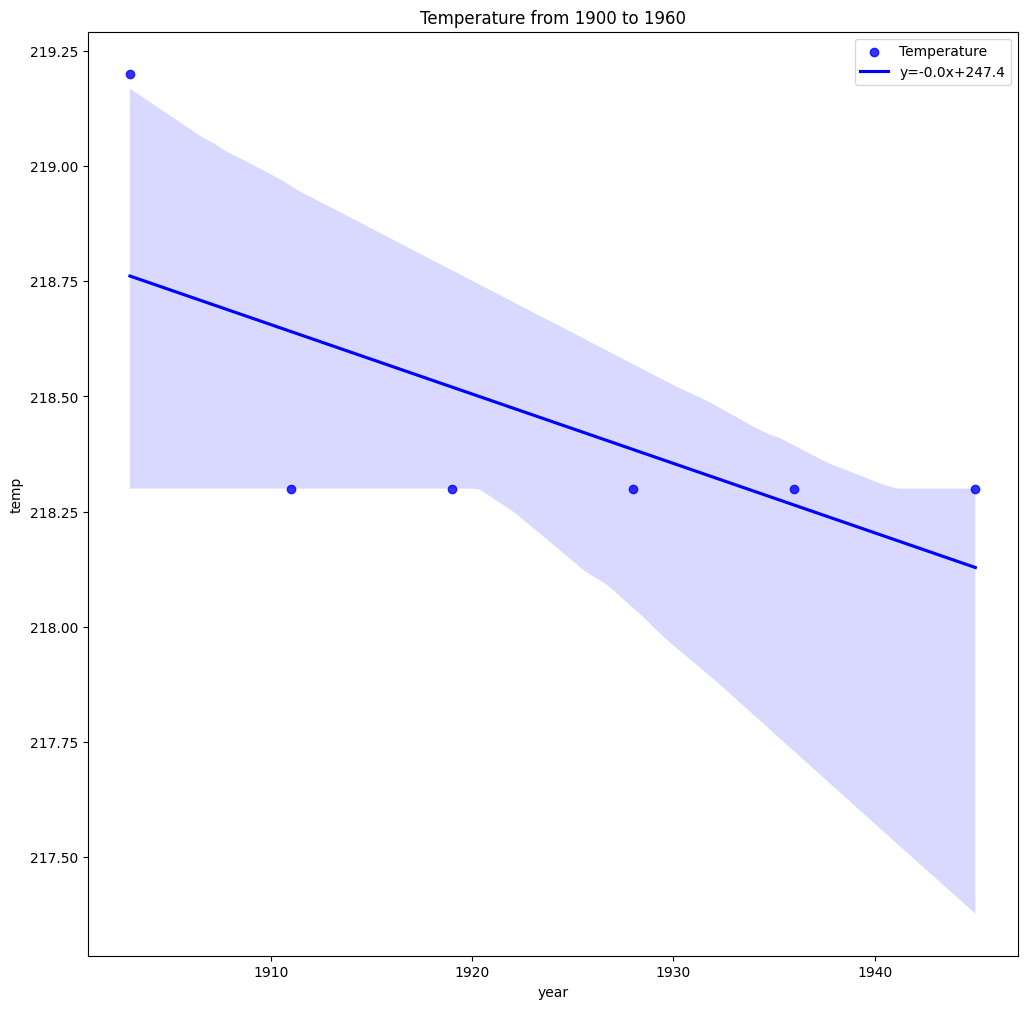

In [72]:
# to mask nan values so slope can be calculated
# https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(temp_CO2_from_1900to1960['year']) & ~np.isnan(temp_CO2_from_1900to1960['temp'])
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(temp_CO2_from_1900to1960['year'][mask],temp_CO2_from_1900to1960['temp'][mask])

# to plot a regression plot of Temperature from 1900-1960 with regression equation
fig, ax1 = plt.subplots(figsize=(12,12))
sns.regplot(x="year", y="temp", data=temp_CO2_from_1900to1960, color="b", ax=ax1, label="Temperature", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope3,intercept3)})
plt.title("Temperature from 1900 to 1960")
ax1.legend()

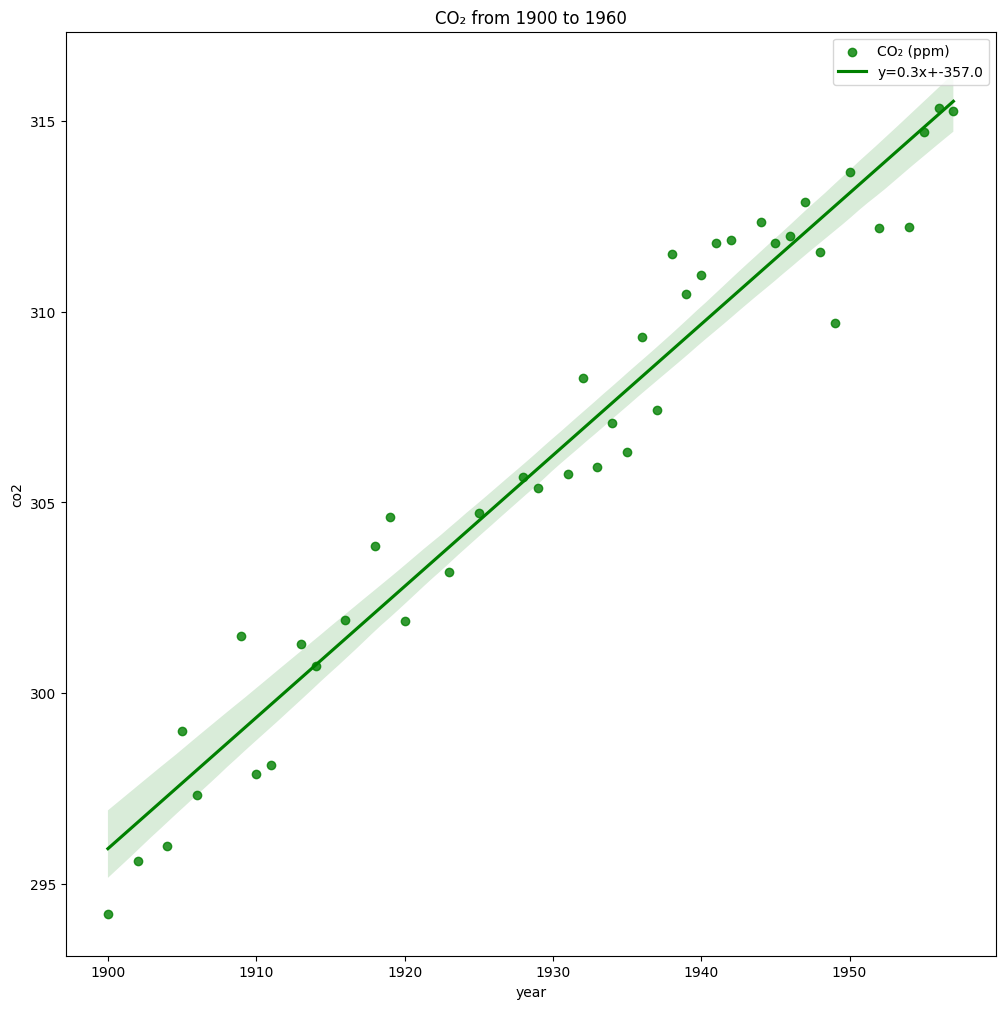

In [101]:
mask = ~np.isnan(temp_CO2_from_1900to1960['year']) & ~np.isnan(temp_CO2_from_1900to1960['co2'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(temp_CO2_from_1900to1960['year'][mask],temp_CO2_from_1900to1960['co2'][mask])

# to plot a regression plot of CO₂ from 1900-1960
fig, ax1 = plt.subplots(figsize=(12,12))
sns.regplot(x="year", y="co2", data=temp_CO2_from_1900to1960, color="g", ax=ax1, label="CO₂ (ppm)", line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope4,intercept4)})
plt.title("CO₂ from 1900 to 1960")
ax1.legend()

### Trends / Relationships between Variables

Trends and relationships between the variables in the dataframe were analysed using plots such as pairplots, line regression plots, as well as correlation statistics generated using the .corr() function from pandas.

- There is a strong positive correlation between temperature and CO₂ as inidicated by the correlation value obtained of 0.93. Therefore, as temperature increases CO₂ also increases, and vice versa.
- Similarly, there is strong negative correlation between sea ice levels and both temperature and CO₂. A value of -0.95 was obtained, indicating that as temperature and CO₂ levels increase, sea ice levels will fall.
- This correlation is as expected. As has been widely studied and researched, temperature and CO₂ levels have accelerated in recent times, leading to unprecedented levels of global warming. This is turn has led to reduction in sea ice levels, as polar ice caps are melting at an alarming rate.
- Of course, a main topic of discussion is what is leading this pehenomenon. Much analysis has been performed in this area, with widespread discussion on whether CO₂ increases are leading to the global temperature increase or vice versa. Former US Vice-President Al Gore is famed for his work in this area, claiming that CO₂ increases are to blame for the global warming issues being experienced today. However, analysis performed on data gathered from ice cores for over 800k years seem to indicate that CO₂ increases actually lag behind temperature increases, causing some to come to the conclusion that CO₂ levels could not be blamed for earth's temperature increase.
- The answer,however, seems to lie somewhere in the middle. Increasing concentration of CO₂ in the atmosphere increases global temperature. Increasing global temperature also increases the concentration of CO₂ in the atmosphere.

https://skepticalscience.com/co2-lags-temperature-advanced.htm

- Linear regression plots with linear regression equation and slope value were created to display the rate of change of the variables over certain time periods.
- As expected, the slope for both temperature and CO₂ was significantly changed from the period 1960 to 2020, compared to that from 1900-1960. This represents the acceleration of both temperature and CO₂ following vast increase in the burning of fossil fuels. CO₂ had a slope of 0.3 in the time period 190-1960, indicating it was increasing during this time period. However, this increase accelerated at an enormous rate from 1960 onwards, resulting in a slope for this time period of 1.6.
- Similarly, the slope of the linear regression equation for temperature data from 1960 onwards of was 1.6, indicating a rapid acceleration in temperature in this time frame. From 1900-1960, the slope for temperature data was 0.0, indicating the temperature was remaining quite consistent during this time period.
- Interestingly, the slope of both temperature and CO₂ data of 1.6 for the time period from 1960-2020 indicates that these variables are changing at a similar rate. The fact that from 1900, CO₂ data appears to be increasing (albeit at a slow rate, slope = 0.3), gives creedance to the fact that temperature increases lagged CO₂ increases, something which will be further touched on below. 

### Lead/Lag Analysis

Lead/lag analysis was performed on the dataset to determine which variable was responsible for the changes. The lead-lag effect is a phenomenon in which a change in one time series has a delayed effect on another time series.

In [74]:
# lagged correlation to a target, testing various lags to see which lag gives the highest correlations
# I tested this for 500 years
# https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas
lagged_correlation = pd.DataFrame.from_dict(
    {x: [combined_data['temp'].corr(combined_data[x].shift(-t)) for t in range(500)] for x in combined_data.columns})

lagged_correlation

,year,temp,co2,sea_ice,temp_ireland,rainfall_ireland
0,0.095402,1.000000,0.927946,-0.947311,-0.394235,0.101079
1,0.094585,0.999205,0.681863,-0.947942,-0.220202,0.314290
2,0.093762,0.999009,0.718057,-0.945066,0.458582,0.086189
3,0.092928,0.998953,0.709844,-0.954568,-0.140682,0.348489
4,0.092082,0.998794,0.708469,-0.941981,-0.282814,0.345247
...,...,...,...,...,...,...
495,-0.037892,0.132262,0.447426,-0.189772,0.130734,0.016422
496,-0.037891,0.128873,0.477492,-0.255080,-0.012634,-0.007162
497,-0.037890,0.134466,0.455801,-0.211468,-0.240902,0.044381
498,-0.038062,0.131831,0.455809,-0.325035,-0.121430,0.023848


In [75]:
# highest correlation for temperature and CO2
lagged_correlation.sort_values(by=['co2'], inplace=True, ascending=False)
lagged_correlation

,year,temp,co2,sea_ice,temp_ireland,rainfall_ireland
0,0.095402,1.000000,0.927946,-0.947311,-0.394235,0.101079
66,-0.006767,0.422698,0.739848,NaN,-0.029371,0.133461
64,-0.006663,0.466692,0.739459,NaN,0.181313,0.019019
65,-0.006718,0.432435,0.729038,NaN,0.192707,0.007985
71,-0.007024,0.394616,0.727374,NaN,0.529187,0.313277
...,...,...,...,...,...,...
461,-0.033315,0.134011,0.453915,-0.058934,-0.112252,-0.027307
492,-0.037501,0.133296,0.453320,0.034863,0.073904,0.040139
474,-0.035103,0.136737,0.450943,0.047242,-0.085516,0.014702
495,-0.037892,0.132262,0.447426,-0.189772,0.130734,0.016422


In [76]:
# highest correlation for temperature and sea ice
lagged_correlation.sort_values(by=['sea_ice'], inplace=True, ascending=True)
lagged_correlation

,year,temp,co2,sea_ice,temp_ireland,rainfall_ireland
224,-0.012459,0.190185,0.485530,-0.999990,-0.209918,-0.005946
225,-0.012445,0.185153,0.482584,-0.999129,-0.181107,-0.146060
229,-0.012373,0.179717,0.474853,-0.998119,-0.098599,-0.019861
227,-0.012409,0.181001,0.489791,-0.995088,0.226809,-0.149122
221,-0.012320,0.185009,0.488625,-0.982617,-0.451838,-0.031206
...,...,...,...,...,...,...
72,-0.007070,0.419040,0.700579,NaN,0.048376,0.127516
63,-0.000961,0.552373,0.657951,NaN,-0.655145,0.132963
62,0.003945,0.634871,0.633311,NaN,-0.479614,0.141164
61,0.003994,0.637367,0.631161,NaN,0.020385,-0.100763


From the data above, temperature and CO₂ seem to have little lag, in that the highest correlation occurs with a lag of zero. The next highest correlation value occurs with a lag of 66. This is a postive correlation value which indicates that temperature increases lag CO₂ increases by about 66 years.

Comparing temperature and sea ice, the highest negative correlation occurs with a lag of 224, indicating that temperature changes lead sea ice changes by about 224 years.

From the linear regression plots mentioned above, the slope of both temperature and CO₂ data of 1.6 for the time period from 1960-2020 indicates that these variables are changing at a similar rate. The fact that from 1900, CO₂ data appears to be increasing (albeit at a slow rate, slope = 0.3), gives creedance to the fact that temperature increases lagged CO₂ level increases.

In [116]:
# to mask nan values
mask = ~np.isnan(combined_data['temp'])
mask2 = ~np.isnan(combined_data['co2'])

In [121]:
from scipy import signal
# https://milos.ai/2018/05/extracting-frequencies-from-time-series-python
# Estimate power spectral density (Pxx) using a periodogram for temperature and CO₂
f, Pxx = signal.periodogram(combined_data.temp[mask])
f2, Pxx2 = signal.periodogram(combined_data.co2[mask2])

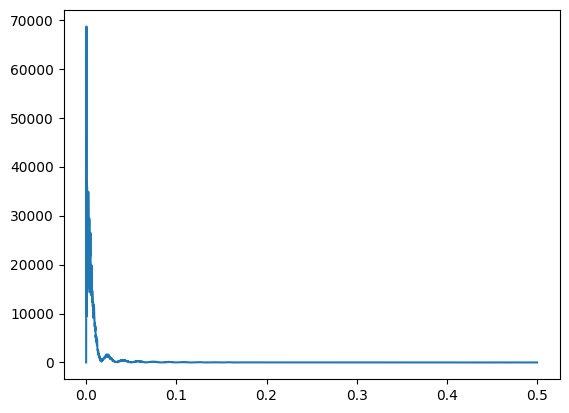

In [122]:
# to plot periodogram for temperature
plt.plot(f, Pxx)

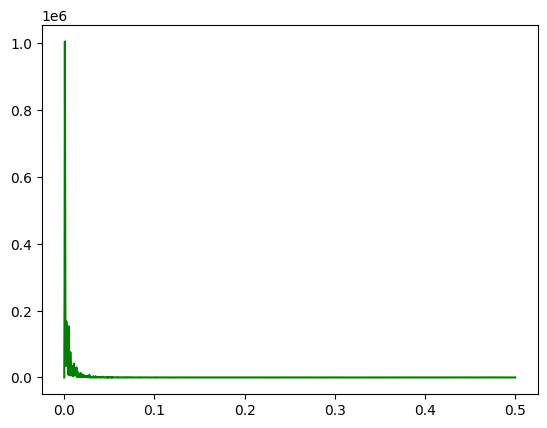

In [120]:
# to plot periodogram for CO₂
plt.plot(f2, Pxx2, color='g')

In [109]:
# frequency analysis for temperature
# https://milos.ai/2018/05/extracting-frequencies-from-time-series-python
top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]

# use same indices to get powers as well
power = Pxx[top3_freq_indices]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods['period1'] = periods[0]
top_3_periods['freq1'] = freqs[0]
top_3_periods['power1'] = power[0]

top_3_periods['period2'] = periods[1]
top_3_periods['freq2'] = freqs[1]
top_3_periods['power2'] = power[1]

top_3_periods['period3'] = periods[2]
top_3_periods['freq3'] = freqs[2]
top_3_periods['power3'] = power[2]

top_3_periods

{'period1': 2935.5,
 'freq1': 0.00034065746891500596,
 'power1': 68634.17882103243,
 'period2': 1467.75,
 'freq2': 0.0006813149378300119,
 'power2': 37147.84580324223,
 'period3': 5871.0,
 'freq3': 0.00017032873445750298,
 'power3': 37080.46154453827}

For temperature, the top 3 frequencies were calculated as:

- The strongest frequency has a period of 2935 years, followed by 1467 years and 5871 years.

In [123]:
# frequency analysis for CO₂

top_3_periods_co2 = {}

# get indices for 3 highest Pxx values
top3_freq_indices_co2 = np.flip(np.argsort(Pxx2), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f2[top3_freq_indices_co2]

# use same indices to get powers as well
power = Pxx2[top3_freq_indices_co2]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods_co2['period1'] = periods[0]
top_3_periods_co2['freq1'] = freqs[0]
top_3_periods_co2['power1'] = power[0]

top_3_periods_co2['period2'] = periods[1]
top_3_periods_co2['freq2'] = freqs[1]
top_3_periods_co2['power2'] = power[1]

top_3_periods_co2['period3'] = periods[2]
top_3_periods_co2['freq3'] = freqs[2]
top_3_periods_co2['power3'] = power[2]

top_3_periods_co2

{'period1': 1481.5,
 'freq1': 0.0006749915626054674,
 'power1': 1004423.1339584109,
 'period2': 987.6666666666665,
 'freq2': 0.0010124873439082012,
 'power2': 464859.94823335594,
 'period3': 2963.0,
 'freq3': 0.0003374957813027337,
 'power3': 265262.36185333837}

Frequency analysis measures how often something appears to enable patterns to be identified in the data.

For temperature, the top 3 frequencies were calculated as:

- The strongest frequency has a period of 2935 years, followed by 1467 years and 5871 years.

For CO₂, the top 3 frequencies were calculated as:

- The strongest frequency has a period of 1481 years, followed by 987 years and 2963 years.

## Data Synthesis - Temperature Anomaly

Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO₂ trends continue.

In [77]:
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [78]:
# to read in csv file containing temperature anomaly data 
epica_tempanomaly = pd.read_csv('CSV Files\epica temp anomaly data.csv', encoding='ISO-8859-1')
epica_tempanomaly.year = epica_tempanomaly.year.round()
epica_tempanomaly = epica_tempanomaly[['year', 'temp_anomaly']]
epica_tempanomaly['year'] = 1950 - epica_tempanomaly['year']
epica_tempanomaly = epica_tempanomaly.astype({'year':'int'})

In [79]:
# to read in another csv file ontaining temperature anomaly data 
nasa_tempanomaly = pd.read_csv('CSV Files/nasa temp anomaly data.csv', encoding='ISO-8859-1', dtype={'year': int})
nasa_tempanomaly = nasa_tempanomaly[['year', 'temp_anomaly']]

In [80]:
# to combine the temperature anomaly data into one dataframe
combined_tempanomaly = epica_tempanomaly.merge(nasa_tempanomaly, how='outer')
combined_tempanomaly.sort_values(by=['year'], inplace=True, ascending=True);

In [81]:
# to display the datatypes of the variables in the dataframe
combined_tempanomaly.dtypes

year              int32
temp_anomaly    float64
dtype: object

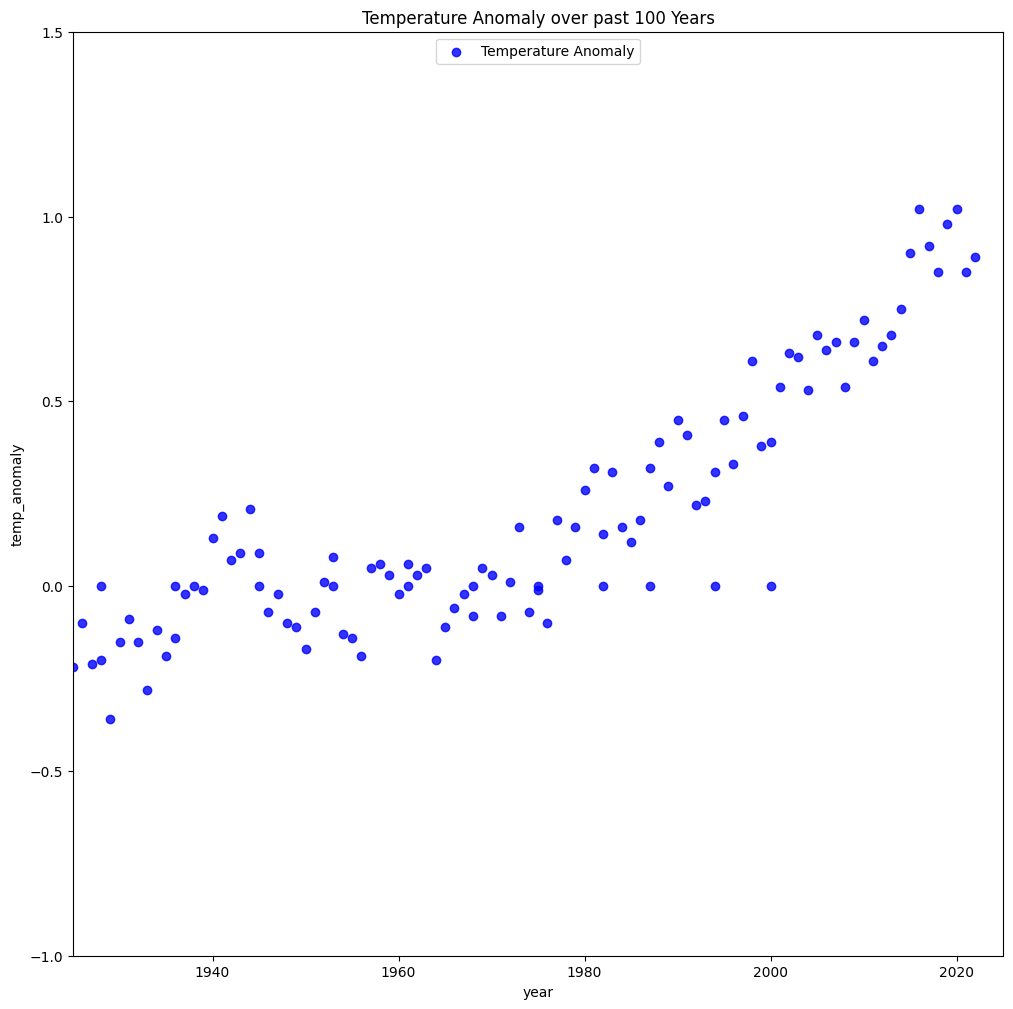

In [127]:
# to plot the temperature anomaly over the past 100 years using seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(x="year", y="temp_anomaly", data=combined_tempanomaly, color="b", ax=ax, label="Temperature Anomaly")
plt.title("Temperature Anomaly over past 100 Years")
ax.set_xlim(1925, 2025)
ax.set_ylim(-1, 1.5)
plt.legend(loc='upper center')

In [83]:
# to replace nan values in the dataframe with 0
combined_tempanomaly = combined_tempanomaly.replace(np.nan, 0)
# https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series
corr, p = pearsonr(combined_tempanomaly[combined_tempanomaly.year >= 1950].year, combined_tempanomaly[combined_tempanomaly.year >= 1950]['temp_anomaly'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.9055402529374557


In [202]:
# to fit a linear regression model for predicting data
# https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series
lr = LinearRegression()

X = combined_tempanomaly[combined_tempanomaly['year'] >= 1950].year
y = combined_tempanomaly[combined_tempanomaly.year >= 1950]['temp_anomaly']

X = X.values.reshape(-1,1)

lr.fit(X, y)

y_pred = lr.predict(X)

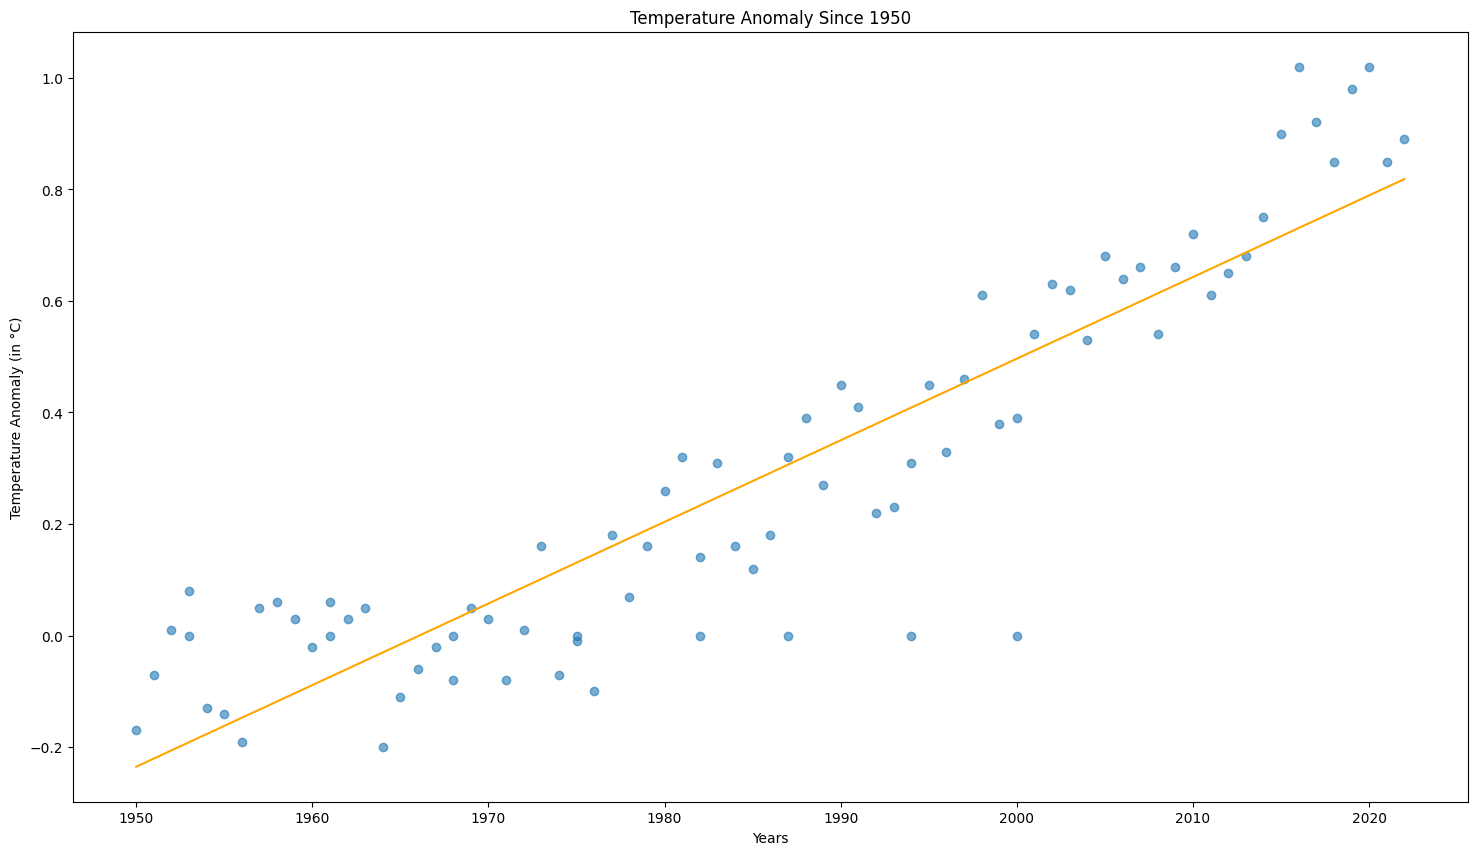

<Figure size 640x480 with 0 Axes>

In [203]:
# to plot temperature anomaly since 1950 with trendline
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (in °C)')
plt.title("Temperature Anomaly Since 1950")
plt.show()
plt.clf()

In [204]:
print(lr.coef_) # yearly increase in temp anomaly
print(lr.coef_ * 10)    # 10 yearly increase in temp anomaly

[0.0146348]
[0.14634799]


In [205]:
# to create a list of years from 2020-2050
a = 2021
t = []
while (2020 < a < 2051):
    t.append(a)
    a += 1

In [209]:
# to calculate predicted data for temp anomaly
predicted_data = lr.predict(np.array([t]).reshape(-1,1)) # temp anomaly prediction for 2021 to 2050

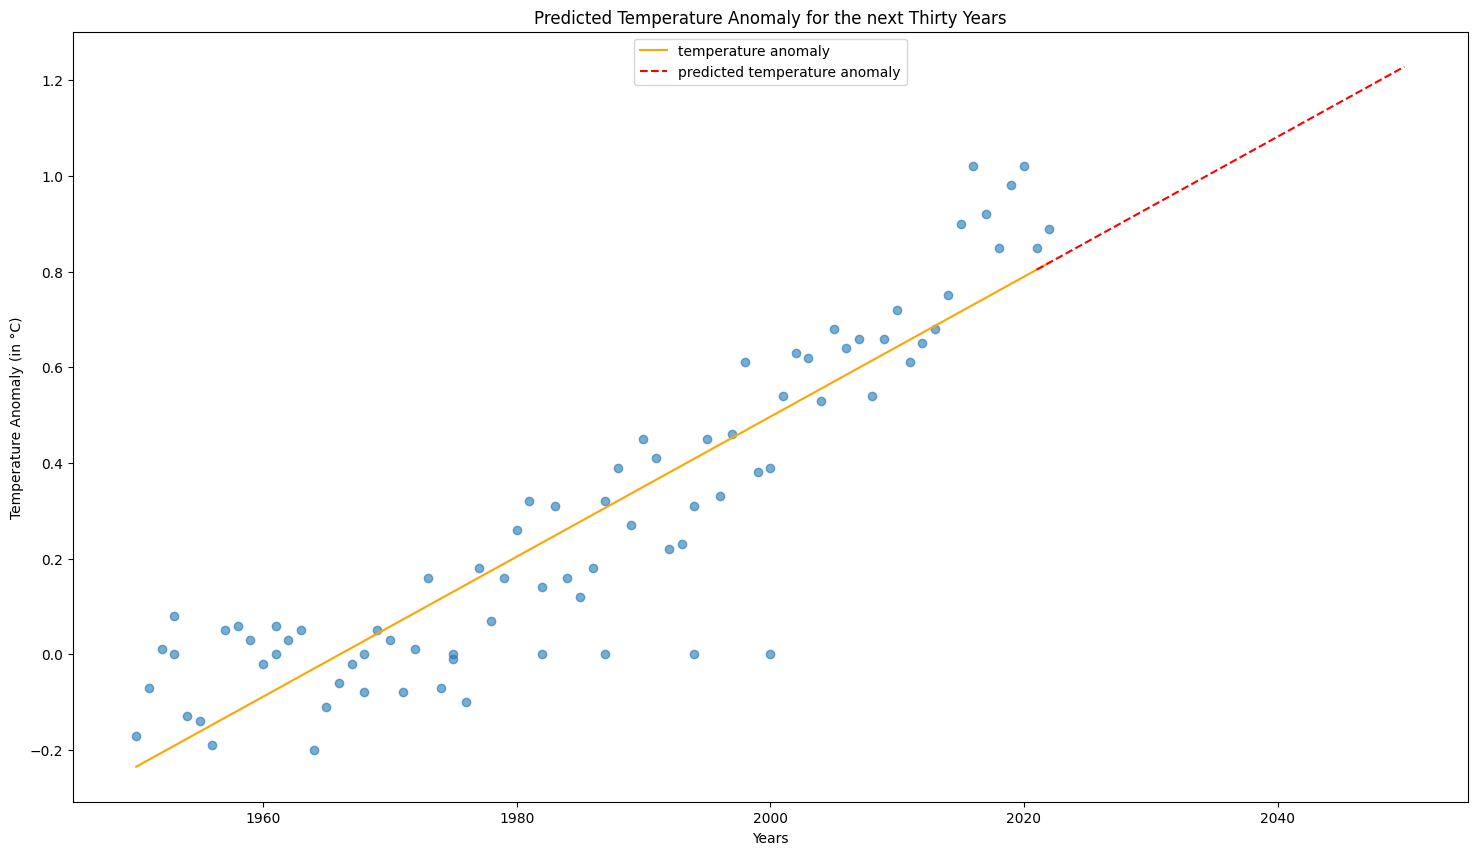

<Figure size 640x480 with 0 Axes>

In [210]:
# to plot predicted temperature anomaly for the next three decades
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange", label="temperature anomaly")
plt.plot(t, predicted_data, color="red", linestyle="dashed", label="predicted temperature anomaly")
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (in °C)') 
plt.legend(loc='upper center')
plt.title("Predicted Temperature Anomaly for the next Thirty Years")
plt.show()
plt.clf()

In [211]:
# this is another method of linear regression modelling
predicted2 = combined_tempanomaly[combined_tempanomaly['year'] >= 1950]

X1 = predicted2['year'].values.reshape(-1,1)
Y1 = predicted2['temp_anomaly']
#split dataset into train and test
# https://valueml.com/global-warming-prediction-using-machine-learning-in-python/?utm_content=cmp-true
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#predict the test set results
y_pred_2 = regressor.predict(X_test)
y_pred_2

array([ 0.05029796,  0.12258977,  0.54188226, -0.06536894,  0.68646588,
        0.72984097,  0.15150649,  0.46959045,  0.44067373,  0.1081314 ,
        0.411757  ,  0.31054847,  0.38284028,  0.19488158,  0.71538261,
       -0.1954942 ,  0.49850718,  0.61417407,  0.29609011, -0.18103584,
        0.65754916, -0.13766075,  0.75875769,  0.81659114,  0.28163175])

In [212]:
predicted_data2 = regressor.predict(np.array([t]).reshape(-1, 1))

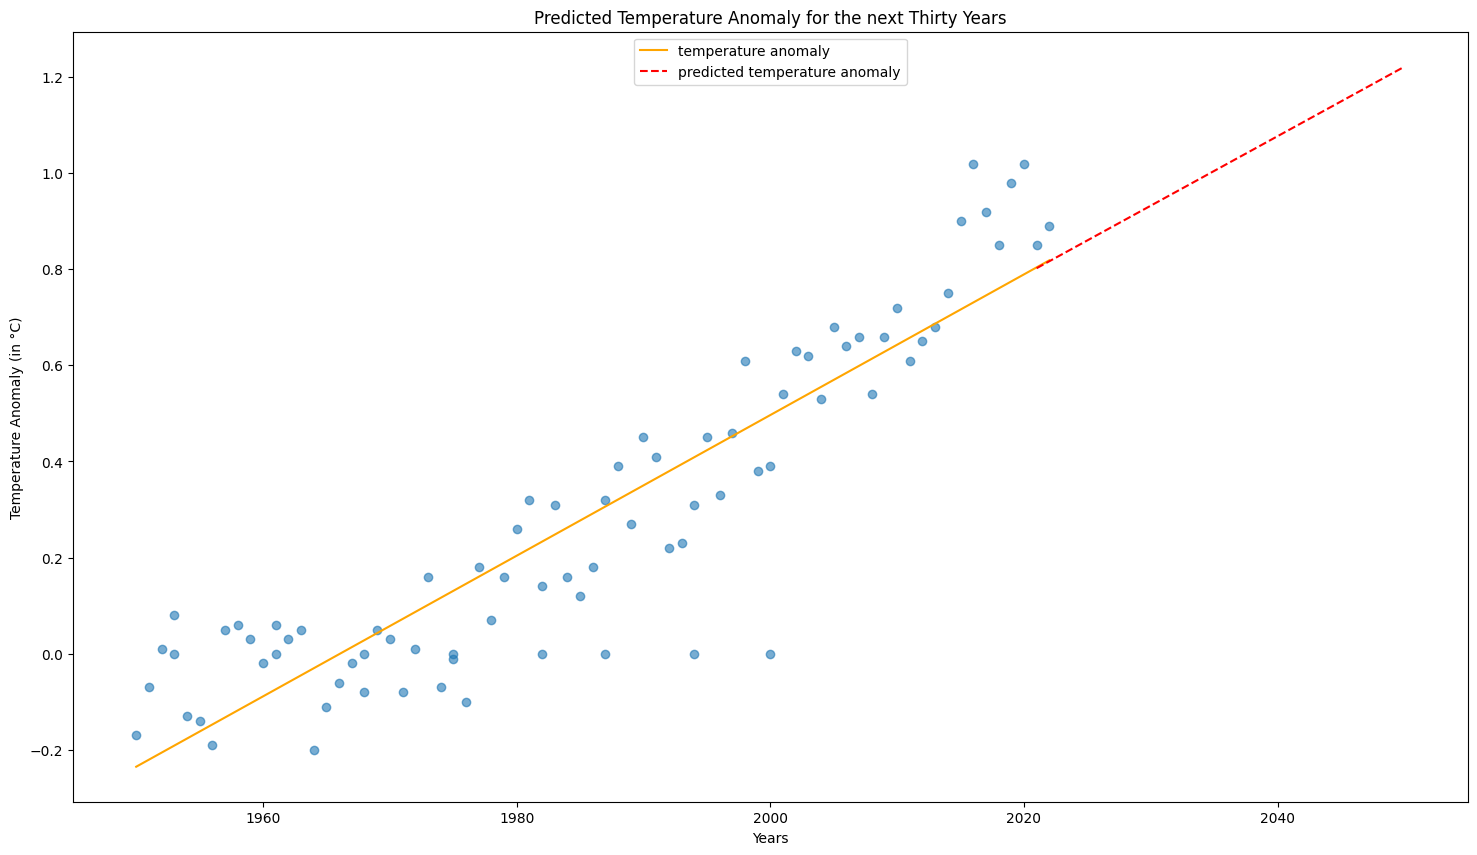

<Figure size 640x480 with 0 Axes>

In [214]:
# to plot predicted temperature anomaly 
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange", label="temperature anomaly")
plt.plot(t, predicted_data2, color="red", linestyle="dashed", label="predicted temperature anomaly")
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (in °C)') 
plt.legend(loc='upper center')
plt.title("Predicted Temperature Anomaly for the next Thirty Years")
plt.show()
plt.clf()

In [92]:
# predicted temperature anomaly for 2050
regressor.predict(np.array([2050]).reshape(-1,1)).round(2)

array([1.22])

A linear regression model was applied for predicting the average yearly temperature anomaly. The data from the year 1950 onwards was used to train and test the data. This is because this period of time represents the acceleration of temperature and CO₂ which has led to unprecendented global warming.

From the graph above, the predicted temperature anomaly for 2050 will exceed 1.2°C by the year 2050. This prediction is in line with published climate models for temperature anomaly if recent atmospheric CO₂ trends continue.

Lang et al (2023) predicted a temparture anomaly of 1.46°C in 2050 using a model with the same time period.

https://www.sciencedirect.com/science/article/pii/S2772662223000772

## Accelerated Warming Based on Very Latest Features

Global warming has hit unprecedented levels in the last 50 years. Temperature data collected from ice cores for over 800,000 years have shown temperature increase and decrease in a somewhat cyclical fashion. The dataset in this notebook clearly shows accelerated warming from the year 1950 onwards, with increases in CO₂ levels remaining in line with increased global temperatures.

A data set from NASA analysing global temperatures from 1880 to 2023 indicte the pace of warming clearly sped up around the year 1970. This acceleration has been attributed to a steep increase in greenhouse gas emissions, combined with efforts in many countries to reduce the amount of sun-reflecting pollution in the air. https://www.washingtonpost.com/climate-environment/2023/12/26/global-warming-accelerating-climate-change/

Added to this, from 1880 to 1969 while the planet warmed, it did so at a slow rate (approximately 0.04 degrees Celsius per decade). From 1970 onwards, this acceleration has risen to 0.19 degrees Celsius, over five times quicker than that seen in the previous nine decades. Again, this has widely been attributed to the increase in burning of fossil fuels, increase in air pollution from aerosols etc. Interestingly, the aerosol pollution actually led to a slower rate of warming, as the lightly coloured particles from the aerosols caused a temporary offset of the warming caused by the burning of fossil fuels. So, as government policies in much of the developed world focused on cleaning up the air pollution, aerosol usage dropped. This combined with the continued rise of greenhouse gas emissions have led to this accelerated warming that has occurred since the 1970s.

There has been commentary on whether a second acceleration has occurred in the 21st century, in particular in the past 15 years. However, there is much more uncertainty about if in fact this is the case.
Accelerationists, such as climate scientist, James E. Hansen and colleagues are predicting an increase in global warming by 50% in the next few decades, while traditionalists such as NASA scientist Mark Richardson has warned against making assumptions based on data from short timeframes as temperatures can change significantly. This thinking was supported by Texas A&M University scientist Andrew Dessler. Overall, it seems more data from a wider timeframe is required before scientists will make estimations on a second acceleration of global warming.

2023 has seen a further acceleration in temperature levels, leading to extreme weather events (such as blizzards, heat waves, wildfires and droughts) , and record-breaking temperatures. A post by Professor Ryan Katz-Rosene from the University of Ottawa displays global temperature data for each decade from the 1950s onwards. It is clear that 2023 has seen a ramp up in temperature which has led to many extreme weather conditions.

![global temperatures](https://pbs.twimg.com/media/F7uHAdrWUAASzTB?format=jpg&name=medium)


However, this extreme temperature data for 2023 has been broadly attributed to a transition from La Niña to El Niño, which are extreme ends of the ENSO cycle - the El Niño-Southern Oscillation. El Niño is characterized by unusually warm ocean temperatures along the the Equatorial Pacific, whereas La Niña is characterized by unusually cold ocean temperatures in this region. These variations influence weather and climate around the globe.

https://psl.noaa.gov/enso/enso_101.html#:~:text=How%20long%20does%20ENSO%20last,long%20as%203%2D4%20years.



***

## References

***

End